# Taller 3. Comparte tu Análisis bivariado
- Juan Sebastián Orozco Hernández 
- Yenny Alexandra Villarreal Suaza
- Cristian Humberto Yepes Marín
- Fredy Yamid Alvarez Palechor

**Realización del Análisis Bivariado en Python (3 puntos)**

- Seleccionar dos variables de un conjunto de datos y justificar su elección.
- Calcular estadísticas que describan la relación entre las variables (correlación, tablas de contingencia, etc.).
- Generar visualizaciones apropiadas, como:
    * Diagramas de dispersión (para variables numéricas).
    * Boxplots comparativos (para una variable numérica y una categórica).
    * Heatmaps de correlación (para múltiples variables numéricas).
    * Gráficos de barras o stacked charts (para variables categóricas).
- Interpretar las tendencias y patrones observados.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns


In [40]:

df = pd.read_csv('Data/DatosAreaMolinos.csv', sep=";")

In [41]:
df

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
0      01/02/2025 5:00                NaN                 NaN   
1      01/03/2025 2:00                NaN                 NaN   
2      01/03/2025 5:00                NaN                 NaN   
3      01/04/2025 2:00                NaN                 NaN   
4      01/04/2025 5:00                NaN                 NaN   
...                ...                ...                 ...   
63790  8/15/2025 23:54                NaN                 NaN   
63791  8/15/2025 23:56                NaN                 NaN   
63792  8/15/2025 23:57                NaN                 NaN   
63793  8/15/2025 23:58                NaN                 NaN   
63794  8/15/2025 23:59                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
0                      NaN            NaN    NaN                0.85   
1                      NaN            NaN    NaN                 NaN   
2                      NaN            NaN    NaN                0.66   
3                      NaN            NaN    NaN                 NaN   
4                      NaN            NaN    NaN                0.58   
...                    ...            ...    ...                 ...   
63790                  NaN            NaN    NaN                 NaN   
63791                  NaN            NaN    NaN                 NaN   
63792                  NaN            NaN    NaN                 NaN   
63793                  NaN            NaN    NaN                 NaN   
63794                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
0                     5.15               329.0                 NaN  ...   
1                     0.00                 NaN                 NaN  ...   
2                     5.28               400.0                 NaN  ...   
3                     0.00                 NaN                 NaN  ...   
4                     5.40               398.0                 NaN  ...   
...                    ...                 ...                 ...  ...   
63790                  NaN                 NaN                 NaN  ...   
63791                  NaN                 NaN                 NaN  ...   
63792                  NaN                 NaN                 NaN  ...   
63793                  NaN                 NaN                 NaN  ...   
63794                  NaN                 NaN                 NaN  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
0                    NaN                NaN                     NaN   
1                    NaN                NaN                     NaN   
2                    NaN                NaN                     NaN   
3                    NaN                NaN                     NaN   
4                    NaN                NaN                     NaN   
...                  ...                ...                     ...   
63790             3000.0             2695.0                     0.0   
63791             3000.0             2705.0                     0.0   
63792             3000.0             2695.0                     0.0   
63793             3000.0             2705.0                     0.0   
63794             2969.0             2695.0                     0.0   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
0                         NaN                     NaN   
1                         NaN                     NaN   
2                         NaN                     NaN   
3                         NaN                     NaN   
4                         NaN                     NaN   
...                       ...                     ...   
63790                     0.0                     0.0   
63791                     0.0                     0.0   
63792                     0.0                     0.0   
63793                     0.0                   

**Diccionario de datos**


In [42]:
df_variables = pd.read_excel('Diccionario.xlsx', sheet_name='Total_Variables')
df_variables[['Nombre ', 'Descripcion ']].drop_duplicates(subset=['Nombre '])

Nombre                            Descripcion 
0             LECBRIXSOLUT2  Lectura Brix Solucion Jugo Diluido T2
1            PUREZAJUGDILT2         % PUREZA JUGO DILUIDO TANDEM 2
2           %PUREZJUGO1EXT2     %PUREZA JUGO PRIMERA EXTRACCION T2
3                     BZSAC             % SACAROSA BAGAZO TANDEM 2
4                 %HUMBZOT2              % HUMEDAD BAGAZO TANDEM 2
5            %REDUCTOJDILT2           % REDUCTORES JUGO DILUIDO T2
6           PHJUGODILUIDOT2                     pH Jugo Diluido T2
7            FOSFATOSJDILT2               FOSFATOS JUGO DILUIDO T2
8            COLORJUGODILT2   COLOR FILTRADO JUGO DILUIDO TANDEM 2
9           TURBIEDADJDILT2        TURBIEDAD JUGO DILUIDO TANDEM 2
10    100_AG_IMBICION_TT_PV      Temperatura de agua de imbibicion
11       100_MOL1_DER_PT_PV         Presion hidraulica derecha #1 
12       100_MOL1_IZQ_PT_PV       Presion hidraulica izquierda #1 
13       100_MOL2_DER_PT_PV          Presion hidraulica derecha #2
14       100_MOL2_IZQ_PT_PV       Presion hidraulica izquierda #2 
15       100_MOL3_DER_PT_PV         Presion hidraulica derecha #3 
16       100_MOL3_IZQ_PT_PV       Presion hidraulica izquierda #3 
17       100_MOL4_DER_PT_PV         Presion hidraulica derecha #4 
18       100_MOL4_IZQ_PT_PV       Presion hidraulica izquierda #4 
19       100_MOL5_DER_PT_PV         Presion hidraulica derecha #5 
20       100_MOL5_IZQ_PT_PV       Presion hidraulica izquierda #5 
21       100_MOL6_DER_PT_PV         Presion hidraulica derecha #6 
22       100_MOL6_IZQ_PT_PV        Presion hidraulica izquierda #6
23             104_VE_PT_PV                  Presion vapor escape 
24   100_DESFIBRADORA_ST_PV         Velocidad Turbina Desfibradora
25        100_MURRAY3_ST_PV            Velocidad Turbina Murray #3
26        100_MURRAY4_ST_PV            Velocidad Turbina Murray #4
27   100_BOMBA_MACE01_IT_PV        Amperaje Bomba de maceracion 01
28   100_BOMBA_MACE04_IT_PV        Amperaje Bomba de maceracion 04
29   100_BOMBA_MACE05_IT_PV        Amperaje Bomba de maceracion 05
30             101_JD_FT_PV             Flujo de diluido a proceso
31  100_MACERACION_FIBRA_PV                       Maceracion Fibra
32        100_BANDA96_ST_PV  Velocidad Banda Alimentadora BANDA 96
33        100_MURRAY1_ST_PV            Velocidad Turbina Murray #1
34        100_MURRAY2_ST_PV            Velocidad Turbina Murray #2
35        100_MURRAY5_ST_PV            Velocidad Turbina Murray #5
36          100_MOL1_TQT_PV                      MOL1 Torque motor
37          100_MOL5_TQT_PV                      MOL5 Torque motor
38          100_MOL6_TQT_PV                      MOL6 Torque motor
39       100_AGUA_IMB_FT_PV               PV Flujo agua imbibicion
40        100_BAGAZO_POL_PV                    Pol bagazo molienda
41    100_BAGAZO_HUMEDAD_PV                Humedad bagazo molienda

**Analisis de Dataset**

In [43]:
df.head()

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
0  01/02/2025 5:00                NaN                 NaN   
1  01/03/2025 2:00                NaN                 NaN   
2  01/03/2025 5:00                NaN                 NaN   
3  01/04/2025 2:00                NaN                 NaN   
4  01/04/2025 5:00                NaN                 NaN   

   201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
0                  NaN            NaN    NaN                0.85   
1                  NaN            NaN    NaN                 NaN   
2                  NaN            NaN    NaN                0.66   
3                  NaN            NaN    NaN                 NaN   
4                  NaN            NaN    NaN                0.58   

   201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
0                 5.15               329.0                 NaN  ...   
1                 0.00                 NaN                 NaN  ...   
2                 5.28               400.0                 NaN  ...   
3                 0.00                 NaN                 NaN  ...   
4                 5.40               398.0                 NaN  ...   

   100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
0                NaN                NaN                     NaN   
1                NaN                NaN                     NaN   
2                NaN                NaN                     NaN   
3                NaN                NaN                     NaN   
4                NaN                NaN                     NaN   

   100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  100_MACERACION_FIBRA_PV  \
0                     NaN                     NaN                      NaN   
1                     NaN                     NaN                      NaN   
2                     NaN                     NaN                      NaN   
3                     NaN                     NaN                      NaN   
4                     NaN                     NaN                      NaN   

   100_BANDA96_ST_PV  100_MURRAY1_ST_PV  100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
0                NaN                NaN                NaN                NaN  
1                NaN                NaN                NaN                NaN  
2                NaN                NaN                NaN                NaN  
3                NaN                NaN                NaN                NaN  
4                NaN                NaN                NaN                NaN  

[5 rows x 30 columns]

In [44]:
df.tail()

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
63790  8/15/2025 23:54                NaN                 NaN   
63791  8/15/2025 23:56                NaN                 NaN   
63792  8/15/2025 23:57                NaN                 NaN   
63793  8/15/2025 23:58                NaN                 NaN   
63794  8/15/2025 23:59                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
63790                  NaN            NaN    NaN                 NaN   
63791                  NaN            NaN    NaN                 NaN   
63792                  NaN            NaN    NaN                 NaN   
63793                  NaN            NaN    NaN                 NaN   
63794                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
63790                  NaN                 NaN                 NaN  ...   
63791                  NaN                 NaN                 NaN  ...   
63792                  NaN                 NaN                 NaN  ...   
63793                  NaN                 NaN                 NaN  ...   
63794                  NaN                 NaN                 NaN  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
63790             3000.0             2695.0                     0.0   
63791             3000.0             2705.0                     0.0   
63792             3000.0             2695.0                     0.0   
63793             3000.0             2705.0                     0.0   
63794             2969.0             2695.0                     0.0   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
63790                     0.0                     0.0   
63791                     0.0                     0.0   
63792                     0.0                     0.0   
63793                     0.0                     0.0   
63794                     0.0                     0.0   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
63790                      0.0                0.0              758.0   
63791                      0.0                0.0              758.0   
63792                      0.0                0.0              758.0   
63793                      0.0                0.0              758.0   
63794                      0.0                0.0              758.0   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
63790              580.0              776.0  
63791              580.0              776.0  
63792              580.0              776.0  
63793              580.0              776.0  
63794              580.0              776.0  

[5 rows x 30 columns]

In [45]:
df.shape

(63795, 30)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63795 entries, 0 to 63794
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     63795 non-null  object 
 1   201_LECBRIXSOLUT2        432 non-null    float64
 2   201_PUREZAJUGDILT2       432 non-null    float64
 3   201_%PUREZJUGO1EXT2      1394 non-null   float64
 4   201_%HUMBZOT2            429 non-null    float64
 5   BZSAC                    431 non-null    float64
 6   201_%REDUCTOJDILT2       586 non-null    float64
 7   201_PHJUGODILUIDOT2      228 non-null    float64
 8   201_FOSFATOSJDILT2       225 non-null    float64
 9   201_COLORJUGODILT2       95 non-null     float64
 10  201_TURBIEDADJDILT2      95 non-null     float64
 11  100_AG_IMBICION_TT_PV    62052 non-null  float64
 12  100_MOL1_DER_PT_PV       62053 non-null  float64
 13  100_MOL1_IZQ_PT_PV       62053 non-null  float64
 14  100_MOL2_DER_PT_PV    

In [47]:
df.describe()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  201_%PUREZJUGO1EXT2  \
count         432.000000          432.000000          1394.000000   
mean           13.596528           83.093519            85.700861   
std             0.655735            1.985120             4.231591   
min            11.000000           74.400000             0.000000   
25%            13.200000           81.900000            84.800000   
50%            13.600000           83.300000            86.300000   
75%            14.000000           84.500000            87.400000   
max            15.600000           87.300000           102.000000   

       201_%HUMBZOT2       BZSAC  201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
count     429.000000  431.000000          586.000000           228.000000   
mean       45.537529    1.249861            0.726536             5.188684   
std         1.698299    0.209807            0.141458             1.173108   
min        40.900000    0.000000            0.000000             0.000000   
25%        44.300000    1.120000            0.640000             5.200000   
50%        45.400000    1.230000            0.720000             5.290000   
75%        46.500000    1.340000            0.800000             5.360000   
max        51.200000    2.700000            1.240000            12.800000   

       201_FOSFATOSJDILT2  201_COLORJUGODILT2  201_TURBIEDADJDILT2  ...  \
count          225.000000           95.000000            95.000000  ...   
mean           295.671111        23791.010526        202975.705263  ...   
std             68.593057         5164.282363         48985.560573  ...   
min              0.000000        13429.000000        130429.000000  ...   
25%            264.000000        19714.000000        161979.500000  ...   
50%            286.000000        23286.000000        204429.000000  ...   
75%            312.000000        27369.000000        230368.500000  ...   
max            624.000000        37333.000000        338200.000000  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
count       51715.000000       51715.000000            51620.000000   
mean         2893.057529        2738.722382               26.260521   
std           614.018355         518.044050                8.611987   
min             0.000000           0.000000                0.000000   
25%          2799.000000        2696.000000               28.300000   
50%          2959.000000        2777.000000               28.800000   
75%          3169.000000        2925.000000               29.200000   
max          4102.000000        3717.000000              100.000000   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
count            51715.000000            51374.000000   
mean                25.775262               27.380728   
std                  8.459177                8.676164   
min                  0.000000                0.000000   
25%                 27.700000               29.100000   
50%                 28.300000               29.700000   
75%                 28.900000               30.400000   
max                 44.100000               64.900000   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
count             51652.000000       51715.000000       51715.000000   
mean                 25.651847          44.304264         773.185020   
std                   8.673618          14.873148         153.924843   
min                   0.000000           0.000000           0.000000   
25%                  27.700000          46.600000         798.000000   
50%                  28.300000          47.500000         798.000000   
75%                  28.900000          48.300000         817.000000   
max                  44.000000         100.000000         857.000000   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
count       51715.000000       51715.000000  
mean          660.130237         722.467081  
std           150.020045         156.265405  
min             0.000000    

**Limpieza de datos**

Cómo la variable objetivo BZSAC (% de Sacaroza en el bagazo) solo tiene registros desde 09/07/2025  4:00:00 se eliminaran los datos o muestras tomadas anterior a esta fecha.

In [48]:

# 1. Se selecciona la variable Time y se convierte para manejo de fechas.
df['Time'] = pd.to_datetime(df['Time'])

# 2. Se define la fecha de corte
fecha_de_corte = '07/09/2025 00:00:00'

# 3.Se filtra el DataFrame para quedar solo con las fechas iguales o posteriores
df_filtrado = df[df['Time'] >= fecha_de_corte].copy()

# 4.Se imprimen las primeras filas del nuevo DataFrame para verificar
df_filtrado.head(10)

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
18076 2025-07-09 00:00:00                NaN                 NaN   
18077 2025-07-09 00:00:00                NaN                 NaN   
18078 2025-07-09 00:01:00                NaN                 NaN   
18079 2025-07-09 00:02:00                NaN                 NaN   
18080 2025-07-09 00:03:00                NaN                 NaN   
18081 2025-07-09 00:05:00                NaN                 NaN   
18082 2025-07-09 00:06:00                NaN                 NaN   
18083 2025-07-09 00:07:00                NaN                 NaN   
18084 2025-07-09 00:08:00                NaN                 NaN   
18085 2025-07-09 00:09:00                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
18076                 84.7           46.0   0.95                 NaN   
18077                  NaN            NaN    NaN                 NaN   
18078                  NaN            NaN    NaN                 NaN   
18079                  NaN            NaN    NaN                 NaN   
18080                  NaN            NaN    NaN                 NaN   
18081                  NaN            NaN    NaN                 NaN   
18082                  NaN            NaN    NaN                 NaN   
18083                  NaN            NaN    NaN                 NaN   
18084                  NaN            NaN    NaN                 NaN   
18085                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
18076                  NaN                 NaN                 NaN  ...   
18077                  NaN                 NaN                 NaN  ...   
18078                  NaN                 NaN                 NaN  ...   
18079                  NaN                 NaN                 NaN  ...   
18080                  NaN                 NaN                 NaN  ...   
18081                  NaN                 NaN                 NaN  ...   
18082                  NaN                 NaN                 NaN  ...   
18083                  NaN                 NaN                 NaN  ...   
18084                  NaN                 NaN                 NaN  ...   
18085                  NaN                 NaN                 NaN  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
18076                NaN                NaN                     NaN   
18077             3100.0             2916.0                    29.2   
18078             2810.0             2715.0                    28.8   
18079             2860.0             2696.0                    29.1   
18080             2989.0             2697.0                    28.6   
18081             3019.0             2917.0                    29.0   
18082             3069.0             2888.0                    29.1   
18083             3050.0             2917.0                    28.7   
18084             2749.0             2826.0                    29.6   
18085             2789.0             2707.0                    29.3   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
18076                     NaN                     NaN   
18077                    26.7                    29.1   
18078                    29.7                    29.0   
18079                    27.5                    30.4   
18080                    29.1                    29.8   
18081                    28.8                    29.1   
18082                    28.6                    28.5   
18083                    28.4                    29.3   
18084                    28.1                    29.3   
18085                    27.3                    29.9   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
18076                      NaN                NaN                NaN   
18077                     33.9               48.0              798.0   
18078                     2

## Se grafican las variables de laboratorio para identificar datos atípicos en el tiempo


Debido a la cantidad de valores nulos y al dominio del problema, se decide comparar las tendencias y normalizar los datos. A su vez, se agrupan los datos por Concentración / Sólidos con las variables `"BZSAC", "201_LECBRIXSOLUT2", "201_%HUMBZOT2"` y otro grupo para la calidad del jugo `"201_PUREZAJUGDILT2", "201_%PUREZJUGO1EXT2", "201_COLORJUGODILT2", "201_TURBIEDADJDILT2"`

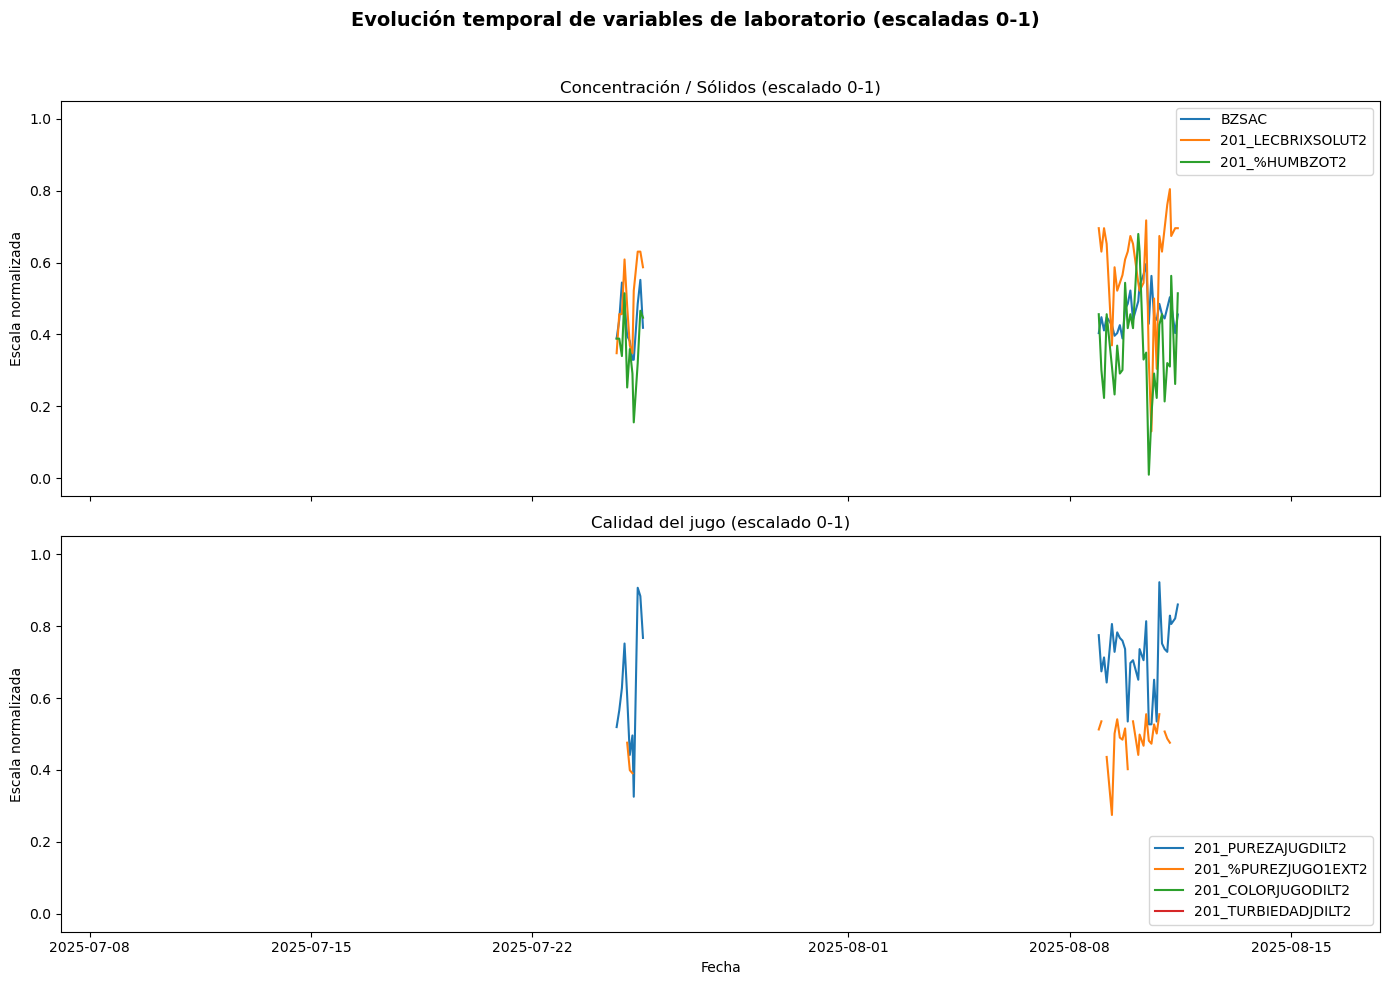

In [49]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Variables a graficar
cols = [
    "BZSAC", "201_LECBRIXSOLUT2", "201_PUREZAJUGDILT2", "201_%PUREZJUGO1EXT2",
    "201_%HUMBZOT2", "201_%REDUCTOJDILT2", "201_PHJUGODILUIDOT2",
    "201_FOSFATOSJDILT2", "201_COLORJUGODILT2", "201_TURBIEDADJDILT2"
]

# Copiamos para no alterar df_filtrado original
df_scaled = df_filtrado.copy()

# Normalización Min-Max (0–1)
scaler = MinMaxScaler()
df_scaled[cols] = scaler.fit_transform(df_filtrado[cols])

# Crear figura con 3 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# --- 1. Grupo: Concentración / Sólidos
vars_concentracion = ["BZSAC", "201_LECBRIXSOLUT2", "201_%HUMBZOT2"]
for var in vars_concentracion:
    axes[0].plot(df_scaled["Time"], df_scaled[var], label=var)
axes[0].set_title("Concentración / Sólidos (escalado 0-1)")
axes[0].set_ylabel("Escala normalizada")
axes[0].legend()

# --- 2. Grupo: Calidad del jugo
vars_calidad = ["201_PUREZAJUGDILT2", "201_%PUREZJUGO1EXT2", 
                "201_COLORJUGODILT2", "201_TURBIEDADJDILT2"]
for var in vars_calidad:
    axes[1].plot(df_scaled["Time"], df_scaled[var], label=var)
axes[1].set_title("Calidad del jugo (escalado 0-1)")
axes[1].set_ylabel("Escala normalizada")
axes[1].legend()

# Etiqueta común en X
axes[1].set_xlabel("Fecha")

plt.suptitle("Evolución temporal de variables de laboratorio (escaladas 0-1)", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

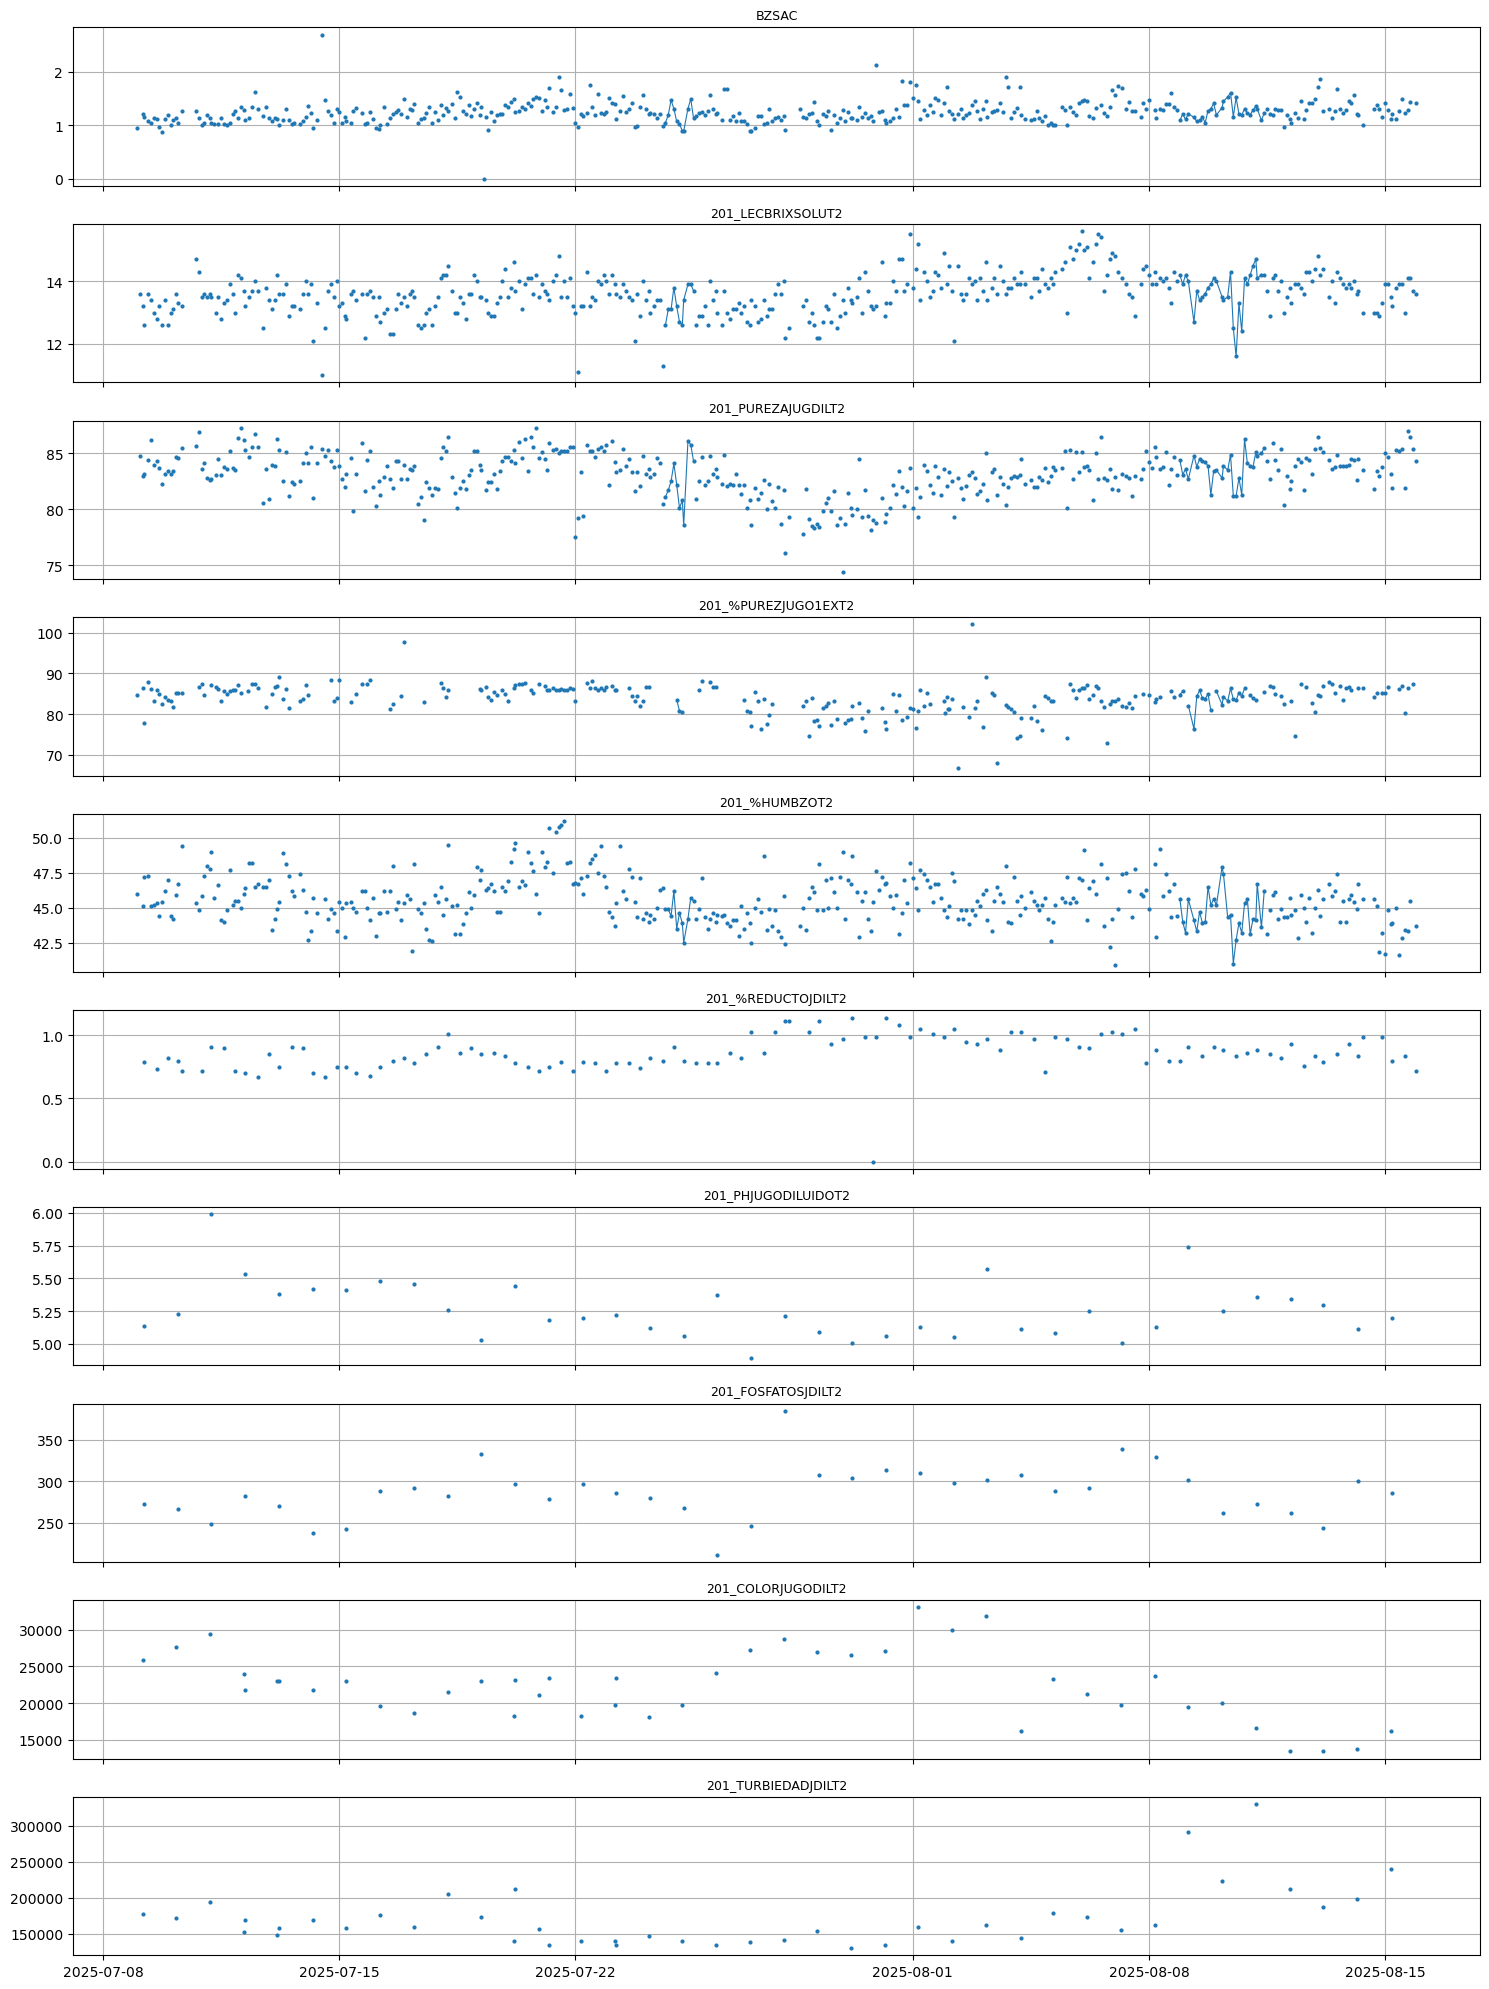

In [50]:
cols = [
    "BZSAC", "201_LECBRIXSOLUT2", "201_PUREZAJUGDILT2", "201_%PUREZJUGO1EXT2",
    "201_%HUMBZOT2", "201_%REDUCTOJDILT2", "201_PHJUGODILUIDOT2",
    "201_FOSFATOSJDILT2", "201_COLORJUGODILT2", "201_TURBIEDADJDILT2"
]

# Asegurar que Time es datetime y ordenar
df_filtrado["Time"] = pd.to_datetime(df_filtrado["Time"], errors="coerce")
df_filtrado = df_filtrado.sort_values("Time")

# Graficar
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(15, 2*len(cols)), sharex=True)

for i, c in enumerate(cols):
    axes[i].plot(df_filtrado["Time"], df_filtrado[c], linestyle="-", marker="o", markersize=2, linewidth=0.8)
    axes[i].set_title(c, fontsize=9)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

* Se ven dos periodos de muestreo: uno a finales de julio y otro en agosto.
Entre esos periodos hay un vacío (no hay datos), lo que puede deberse a que no se tomaron muestras o hubo pausas en el proceso.

* Se puede observar que las variables relacionadas con sólidos y pureza se comportan de manera un poco más sincronizada y más estable en el tiempo, mientras que las variables de color y turbidez presentan mayor variabilidad. Esto sugiere que la calidad química del jugo es más constante que sus propiedades visuales.

## Se grafican las variables de los sensores para identificar datos atípicos en el tiempo

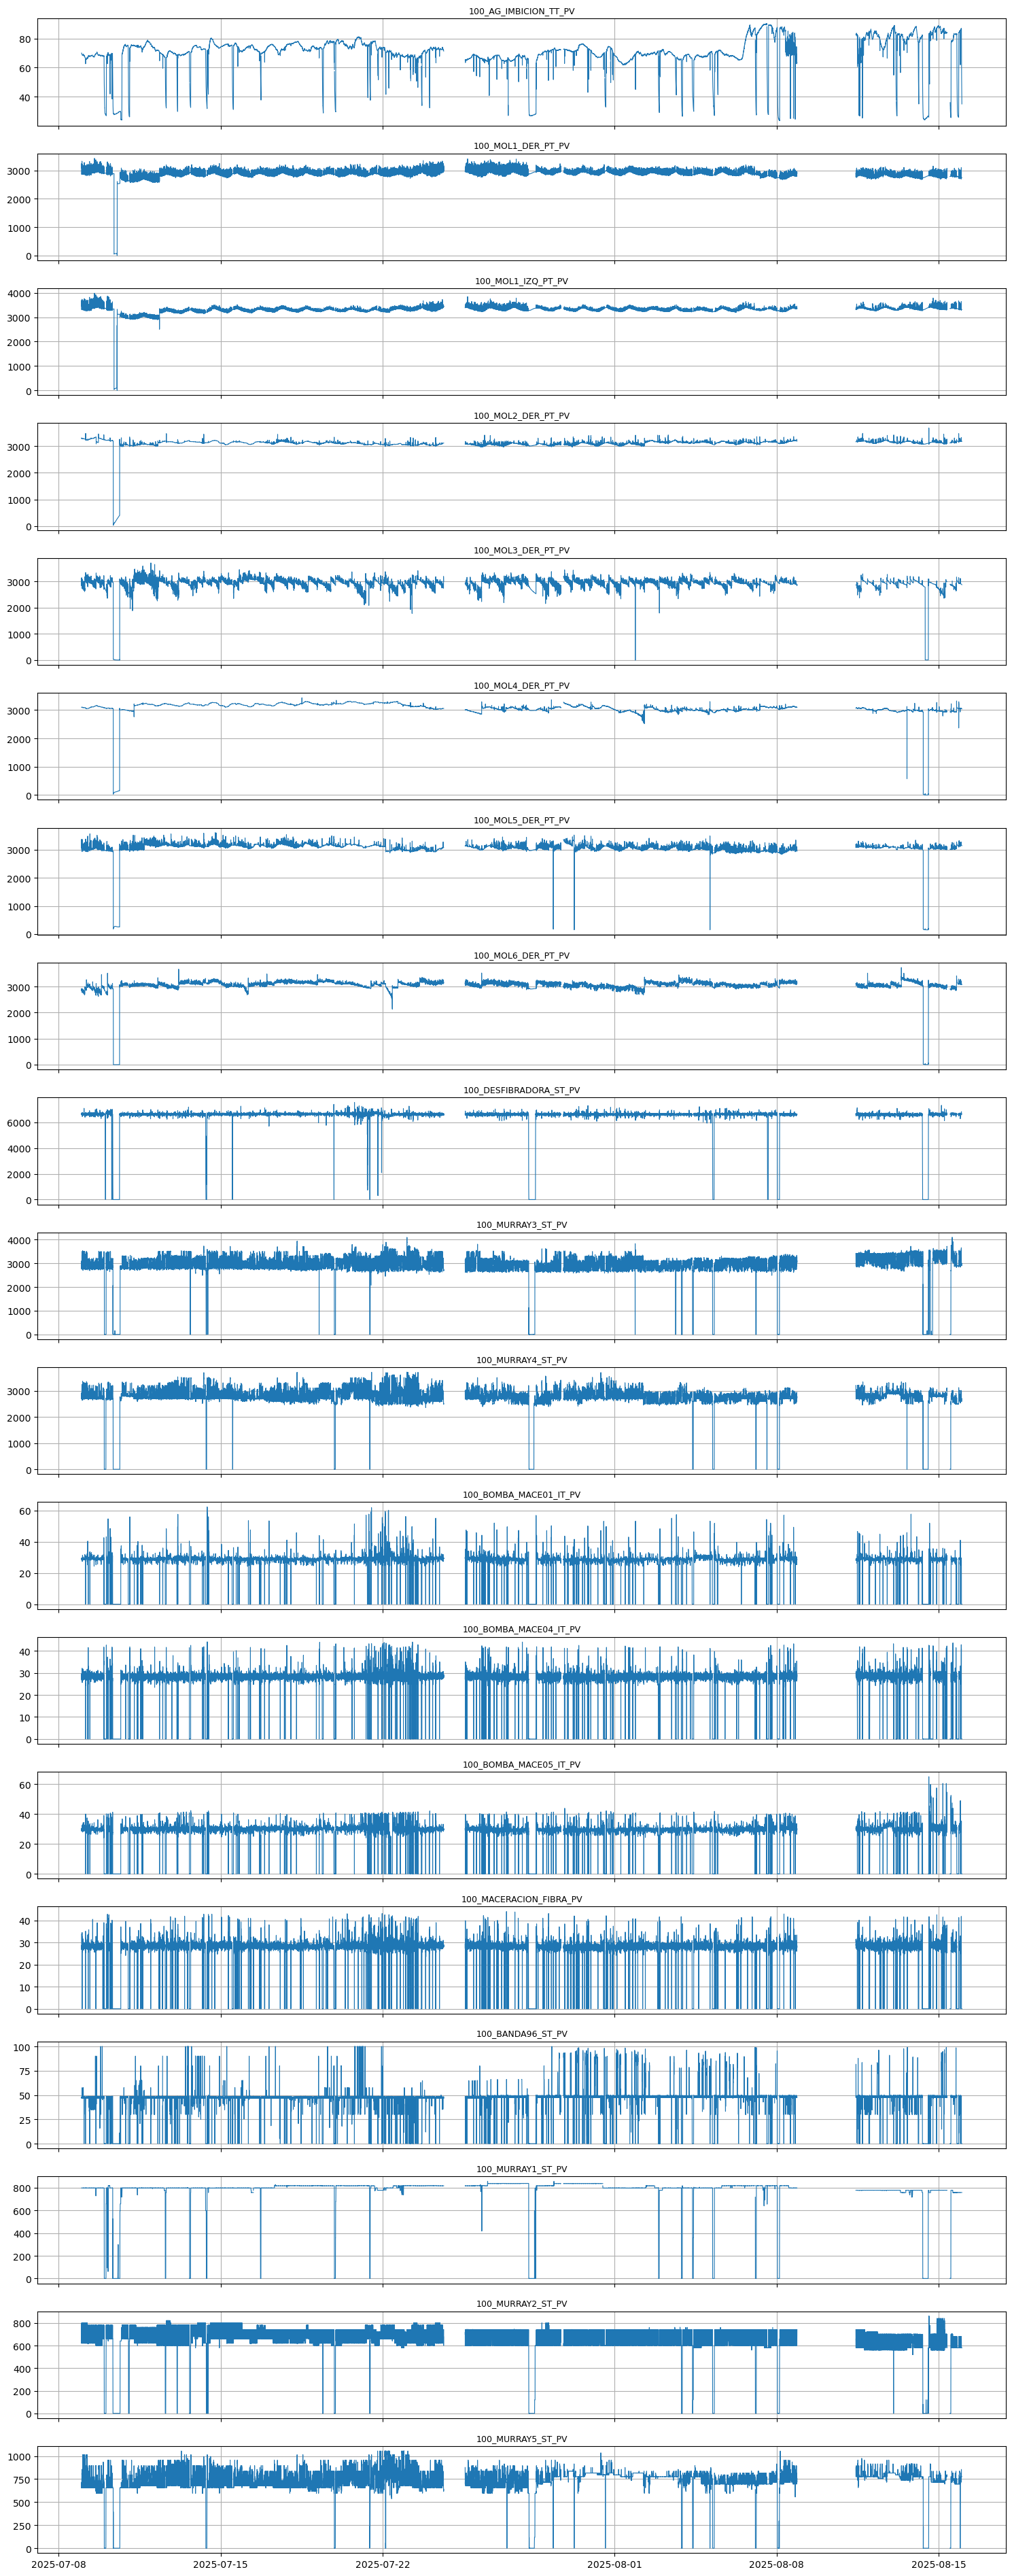

In [51]:
cols = [
    "100_AG_IMBICION_TT_PV", "100_MOL1_DER_PT_PV", "100_MOL1_IZQ_PT_PV",
    "100_MOL2_DER_PT_PV", "100_MOL3_DER_PT_PV", "100_MOL4_DER_PT_PV",
    "100_MOL5_DER_PT_PV", "100_MOL6_DER_PT_PV", "100_DESFIBRADORA_ST_PV",
    "100_MURRAY3_ST_PV", "100_MURRAY4_ST_PV", "100_BOMBA_MACE01_IT_PV",
    "100_BOMBA_MACE04_IT_PV", "100_BOMBA_MACE05_IT_PV", "100_MACERACION_FIBRA_PV",
    "100_BANDA96_ST_PV", "100_MURRAY1_ST_PV", "100_MURRAY2_ST_PV", "100_MURRAY5_ST_PV"
]

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(15, 2*len(cols)), sharex=True)

for i, c in enumerate(cols):
    axes[i].plot(df_filtrado["Time"], df_filtrado[c], linewidth=0.8)
    axes[i].set_title(c, fontsize=9)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Luego de visualizar el comportamiento atípico, se decide completar con la media

In [52]:
df_new = df_filtrado.copy()  # copia del original

# Lista de variables que quieres procesar
cols = [
    "100_AG_IMBICION_TT_PV", "100_MOL1_DER_PT_PV", "100_MOL1_IZQ_PT_PV",
    "100_MOL2_DER_PT_PV", "100_MOL3_DER_PT_PV", "100_MOL4_DER_PT_PV",
    "100_MOL5_DER_PT_PV", "100_MOL6_DER_PT_PV", "100_DESFIBRADORA_ST_PV",
    "100_MURRAY3_ST_PV", "100_MURRAY4_ST_PV", "100_BOMBA_MACE01_IT_PV",
    "100_BOMBA_MACE04_IT_PV", "100_BOMBA_MACE05_IT_PV", "100_MACERACION_FIBRA_PV",
    "100_BANDA96_ST_PV", "100_MURRAY1_ST_PV", "100_MURRAY2_ST_PV", "100_MURRAY5_ST_PV"
]


def replace_outliers_with_mean(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df.loc[df[col] != 0, col].mean()
    
    

    return df[col].apply(
        lambda x: mean_value if (x == 0 or x < lower_bound or x > upper_bound) else x
    )

# Aplicar en copia
for c in cols:
    if c in df_new.columns:
        df_new[c] = replace_outliers_with_mean(df_new, c)

# visualizacion de datos,  luego de imputar con la media

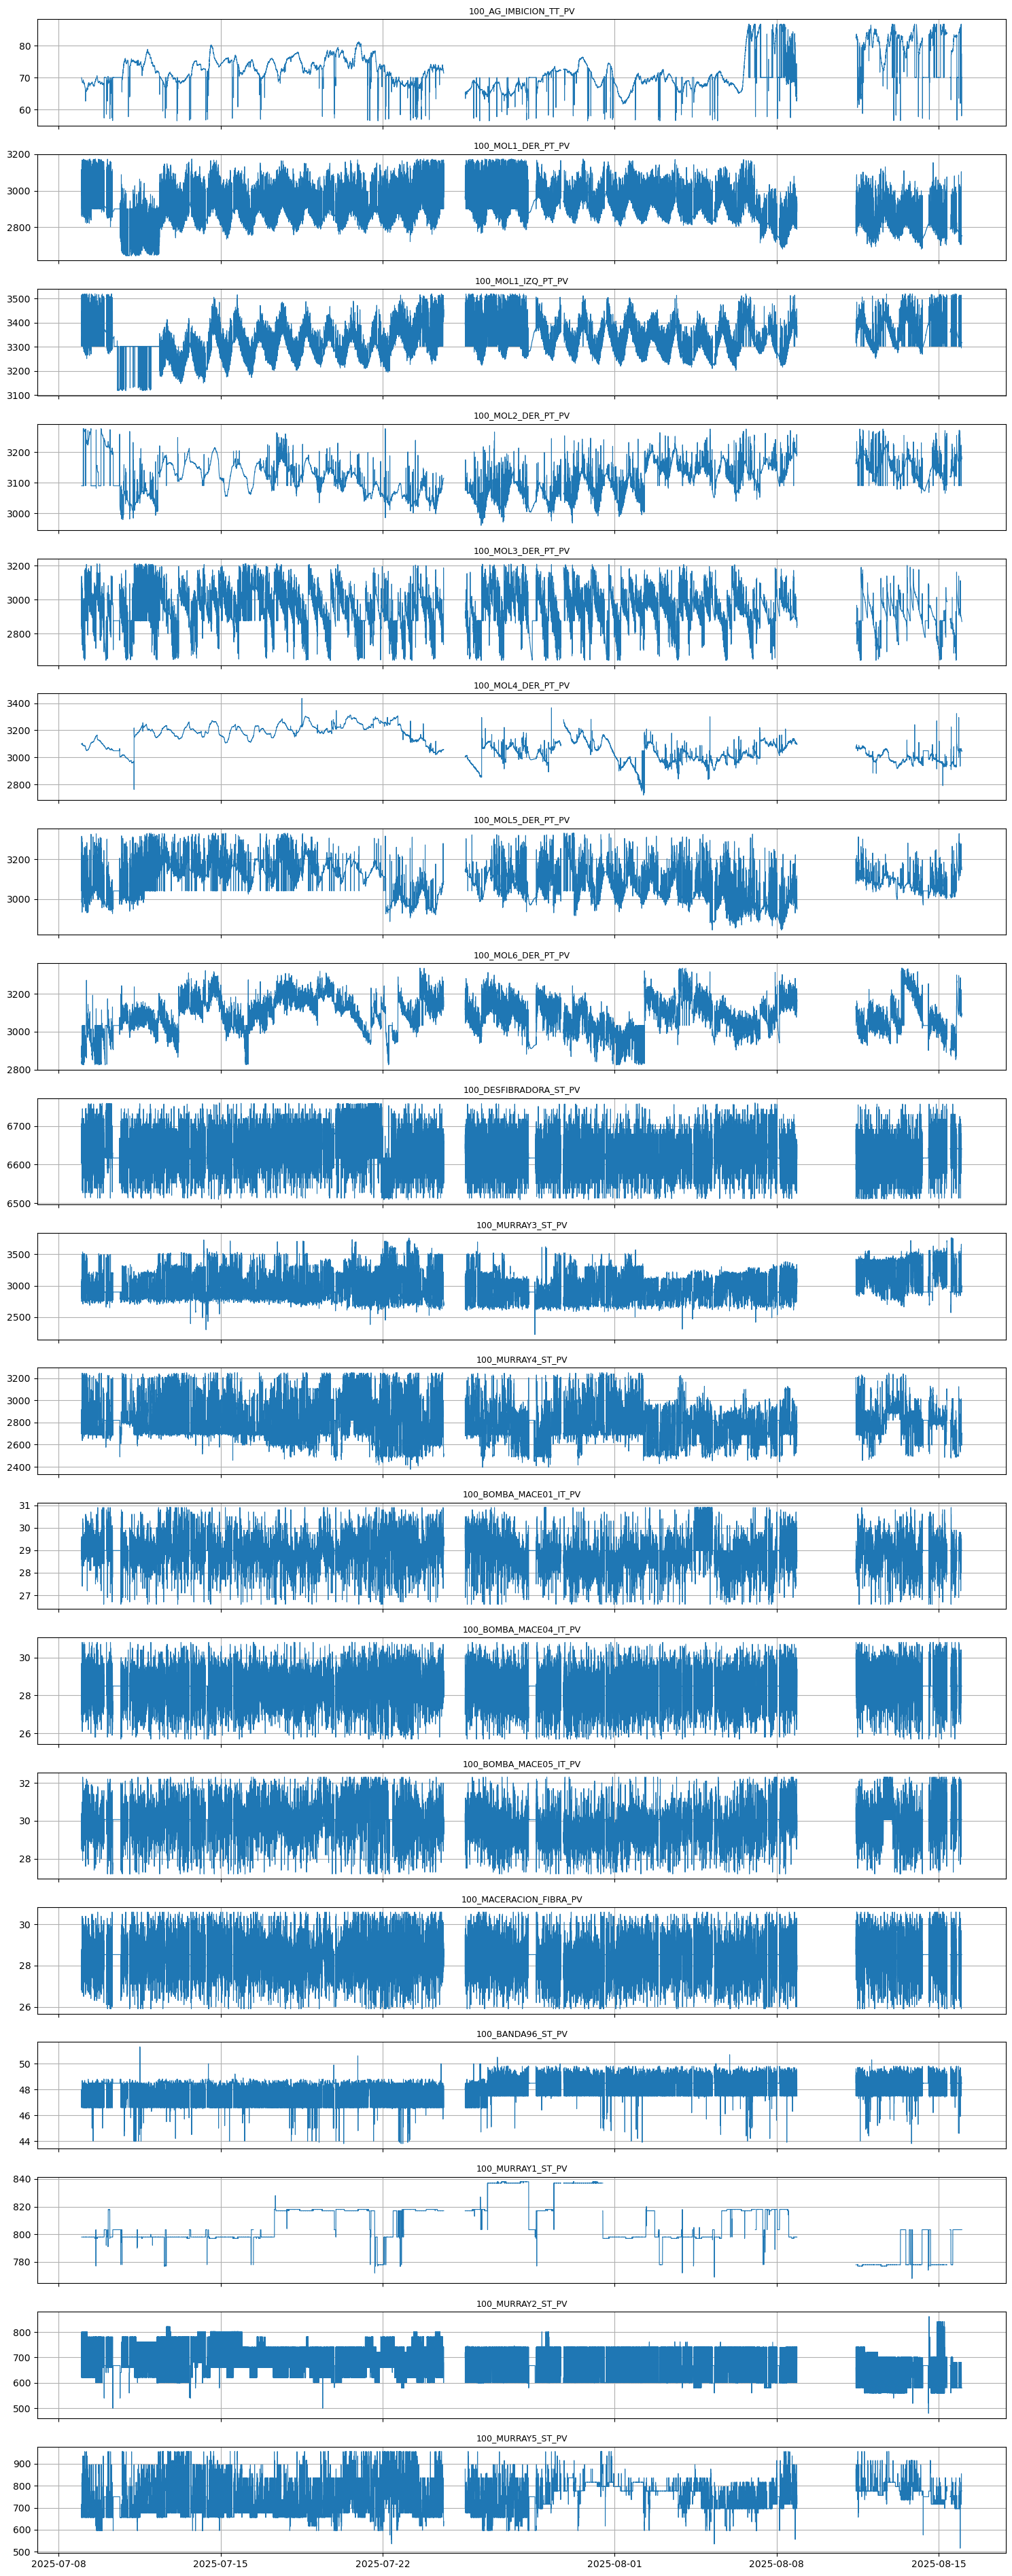

In [53]:
cols = [
    "100_AG_IMBICION_TT_PV", "100_MOL1_DER_PT_PV", "100_MOL1_IZQ_PT_PV",
    "100_MOL2_DER_PT_PV", "100_MOL3_DER_PT_PV", "100_MOL4_DER_PT_PV",
    "100_MOL5_DER_PT_PV", "100_MOL6_DER_PT_PV", "100_DESFIBRADORA_ST_PV",
    "100_MURRAY3_ST_PV", "100_MURRAY4_ST_PV", "100_BOMBA_MACE01_IT_PV",
    "100_BOMBA_MACE04_IT_PV", "100_BOMBA_MACE05_IT_PV", "100_MACERACION_FIBRA_PV",
    "100_BANDA96_ST_PV", "100_MURRAY1_ST_PV", "100_MURRAY2_ST_PV", "100_MURRAY5_ST_PV"
]

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(15, 2*len(cols)), sharex=True)

for i, c in enumerate(cols):
    axes[i].plot(df_new["Time"], df_new[c], linewidth=0.8)
    axes[i].set_title(c, fontsize=9)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Luego de visualizar el comportamiento, se decide aplicar una técnica de limpieza que permite la imputación de los datos con los +-30 registros más cercanos

In [54]:
df_filtrado=df_new

# Convierte la columna 'Time' a tipo datetime
df_filtrado['Time'] = pd.to_datetime(df_filtrado['Time'])

# Elimina las filas con 'Time' duplicados
df_filtrado = df_filtrado.drop_duplicates(subset=['Time'], keep='first')

# Establece 'Time' como el índice
df_filtrado.set_index('Time', inplace=True)

# Separa la columna 'BZSAC'
bzsac_df = df_filtrado[['BZSAC']].dropna()

# Obtiene la lista de otras columnas
other_columns = df_filtrado.columns.drop('BZSAC')

# Crea un DataFrame vacío para los datos remuestreados
resampled_df = pd.DataFrame(index=bzsac_df.index)

# Itera sobre las otras columnas y las rellena usando una ventana móvil
for col in other_columns:
    # Copia la columna para trabajar en ella
    temp_series = df_filtrado[col].copy()

    # Rellena con la media de los 30 valores anteriores
    rolling_mean_forward = temp_series.rolling(window=30, min_periods=1).mean()
    temp_series = temp_series.fillna(rolling_mean_forward)

    # Rellena con la media de los 30 valores siguientes
    temp_series_reversed = temp_series.iloc[::-1]
    rolling_mean_backward = temp_series_reversed.rolling(window=30, min_periods=1).mean()
    temp_series = temp_series.fillna(rolling_mean_backward.iloc[::-1])

    # Reindexa la serie rellena a los puntos de tiempo de 'BZSAC'
    resampled_df[col] = temp_series.reindex(bzsac_df.index)

# Concatena la columna 'BZSAC' con los datos remuestreados
final_df = pd.concat([resampled_df, bzsac_df], axis=1)

# Muestra las primeras filas del dataframe final
final_df.head()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
Time                                                         
2025-07-09 00:00:00                NaN                 NaN   
2025-07-09 04:00:00               13.2                83.0   
2025-07-09 08:00:00               13.6                84.4   
2025-07-09 10:00:00               13.4                86.2   
2025-07-09 14:00:00               12.8                84.3   

                     201_%PUREZJUGO1EXT2  201_%HUMBZOT2  201_%REDUCTOJDILT2  \
Time                                                                          
2025-07-09 00:00:00                 84.7           46.0                 NaN   
2025-07-09 04:00:00                 86.4           45.1                 NaN   
2025-07-09 08:00:00                 87.9           47.3                 NaN   
2025-07-09 10:00:00                 86.1           45.1                 NaN   
2025-07-09 14:00:00                 86.0           45.3                0.73   

                     201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  \
Time                                                           
2025-07-09 00:00:00                  NaN                 NaN   
2025-07-09 04:00:00                  NaN                 NaN   
2025-07-09 08:00:00                  NaN                 NaN   
2025-07-09 10:00:00                  NaN                 NaN   
2025-07-09 14:00:00                  NaN                 NaN   

                     201_COLORJUGODILT2  201_TURBIEDADJDILT2  \
Time                                                           
2025-07-09 00:00:00                 NaN                  NaN   
2025-07-09 04:00:00             25857.0             177429.0   
2025-07-09 08:00:00                 NaN                  NaN   
2025-07-09 10:00:00                 NaN                  NaN   
2025-07-09 14:00:00                 NaN                  NaN   

                     100_AG_IMBICION_TT_PV  ...  100_MURRAY4_ST_PV  \
Time                                        ...                      
2025-07-09 00:00:00              69.437931  ...        2902.620690   
2025-07-09 04:00:00              66.806897  ...        2897.033997   
2025-07-09 08:00:00              68.186207  ...        2776.000000   
2025-07-09 10:00:00              68.096552  ...        2800.206897   
2025-07-09 14:00:00              68.434483  ...        2726.586207   

                     100_BOMBA_MACE01_IT_PV  100_BOMBA_MACE04_IT_PV  \
Time                                                                  
2025-07-09 00:00:00               28.906897               28.255172   
2025-07-09 04:00:00               29.196552               28.444828   
2025-07-09 08:00:00               29.275862               28.427586   
2025-07-09 10:00:00               29.179310               28.231034   
2025-07-09 14:00:00               29.103448               28.334483   

                     100_BOMBA_MACE05_IT_PV  100_MACERACION_FIBRA_PV  \
Time                                                                   
2025-07-09 00:00:00               29.513793                28.086207   
2025-07-09 04:00:00               30.027586                28.648276   
2025-07-09 08:00:00               29.837931                28.300000   
2025-07-09 10:00:00               29.484929                28.158621   
2025-07-09 14:00:00               29.534483                28.270186   

                     100_BANDA96_ST_PV  100_MURRAY1_ST_PV  100_MURRAY2_ST_PV  \
Time                                                                           
2025-07-09 00:00:00          46.775862         798.000000         724.448276   
2025-07-09 04:00:00          47.090820         798.000000         732.620690   
2025-07-09 08:00:00          47.262662         798.000000         678.724138   
2025-07-09 10:00:00          47.631080         798.000000         722.068966   
2025-07-09 14:00:00          48.017880         797.931034         691.448276   

                     100_MURRAY5_ST_PV  BZSAC  
Time                           

In [55]:
df_filtrado = final_df

In [56]:
df_filtrado.shape

(370, 29)

In [57]:
df_filtrado['BZSAC'].isna().sum()

np.int64(0)

# **Resampling de las variables fue el metodo de la primera version, modificado por sugerencia recibida en la monitoria - No ejecutar** 

In [58]:
'''

# Convertir la columna "Time" a tipo datetime
df_filtrado["Time"] = pd.to_datetime(df_filtrado["Time"], errors="coerce")

# Establecer "Time" como índice
df_resample = df_filtrado.set_index("Time")

# Resamplear a intervalos de 3 horas y calcular la media
df_resample_1h = df_resample.resample("3H").mean()

df_resample_1h.to_csv('variables_resapleadas.csv')

# Mostrar las primeras filas del dataframe resampleado
df_resample_1h.head()

'''

'\n\n# Convertir la columna "Time" a tipo datetime\ndf_filtrado["Time"] = pd.to_datetime(df_filtrado["Time"], errors="coerce")\n\n# Establecer "Time" como índice\ndf_resample = df_filtrado.set_index("Time")\n\n# Resamplear a intervalos de 3 horas y calcular la media\ndf_resample_1h = df_resample.resample("3H").mean()\n\ndf_resample_1h.to_csv(\'variables_resapleadas.csv\')\n\n# Mostrar las primeras filas del dataframe resampleado\ndf_resample_1h.head()\n\n'

In [59]:
df_resample_1h=df_filtrado
df_resample_1h.shape

(370, 29)

In [60]:
df_resample_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370 entries, 2025-07-09 00:00:00 to 2025-08-15 22:00:00
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   201_LECBRIXSOLUT2        365 non-null    float64
 1   201_PUREZAJUGDILT2       365 non-null    float64
 2   201_%PUREZJUGO1EXT2      254 non-null    float64
 3   201_%HUMBZOT2            369 non-null    float64
 4   201_%REDUCTOJDILT2       129 non-null    float64
 5   201_PHJUGODILUIDOT2      68 non-null     float64
 6   201_FOSFATOSJDILT2       68 non-null     float64
 7   201_COLORJUGODILT2       76 non-null     float64
 8   201_TURBIEDADJDILT2      76 non-null     float64
 9   100_AG_IMBICION_TT_PV    370 non-null    float64
 10  100_MOL1_DER_PT_PV       370 non-null    float64
 11  100_MOL1_IZQ_PT_PV       370 non-null    float64
 12  100_MOL2_DER_PT_PV       370 non-null    float64
 13  100_MOL3_DER_PT_PV       370 non-null    fl

In [61]:
df_resample_1h.describe()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  201_%PUREZJUGO1EXT2  \
count         365.000000          365.000000           254.000000   
mean           13.584658           83.059452            83.858376   
std             0.630877            2.021913             3.429463   
min            11.100000           74.400000            66.700000   
25%            13.200000           81.900000            82.000000   
50%            13.600000           83.300000            84.400000   
75%            14.000000           84.500000            86.275000   
max            15.600000           87.300000           102.000000   

       201_%HUMBZOT2  201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
count      369.00000          129.000000            68.000000   
mean        45.53794            0.866165             5.356604   
std          1.71875            0.103818             0.264503   
min         40.90000            0.670000             4.890000   
25%         44.30000            0.800000             5.075000   
50%         45.40000            0.860000             5.395000   
75%         46.50000            0.910000             5.495000   
max         51.20000            1.140000             5.990000   

       201_FOSFATOSJDILT2  201_COLORJUGODILT2  201_TURBIEDADJDILT2  \
count           68.000000           76.000000            76.000000   
mean           285.548331        21007.257909        202360.428491   
std             24.628292         3457.240247         61599.981321   
min            211.000000        13429.000000        130429.000000   
25%            268.000000        19429.000000        140715.000000   
50%            282.000000        19714.250000        175143.000000   
75%            302.000000        23000.000000        257062.500000   
max            385.000000        31833.000000        330166.000000   

       100_AG_IMBICION_TT_PV  ...  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
count             370.000000  ...         370.000000              370.000000   
mean               71.772638  ...        2803.752065               28.919662   
std                 5.338628  ...         112.548187                0.436941   
min                62.548276  ...        2508.896552               27.596552   
25%                68.097414  ...        2734.086207               28.650025   
50%                71.108621  ...        2807.396552               28.943842   
75%                74.931034  ...        2878.438805               29.198800   
max                86.379310  ...        3071.758621               30.257267   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
count              370.000000              370.000000   
mean                28.443084               29.922550   
std                  0.217854                0.449974   
min                 27.000000               28.820690   
25%                 28.279310               29.603926   
50%                 28.468926               29.920112   
75%                 28.572414               30.198337   
max                 28.925949               31.292334   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
count               370.000000         370.000000         370.000000   
mean                 28.446760          47.833237         806.994687   
std                   0.260479           0.529923          16.324640   
min                  27.627586          46.634483         777.000000   
25%                  28.270743          47.437508         798.000000   
50%                  28.455172          47.862613         800.350229   
75%                  28.621605          48.222453         818.000000   
max                  29.239363          49.189655         838.000000   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV       BZSAC  
count         370.000000         370.000000  370.000000  
mean          687.875302         750.098541    1.243838  
std            34.005919          52.317589    0.199811  
min           578.068966         606.655172    0.000

**Se analizan las variables con valores nulos**

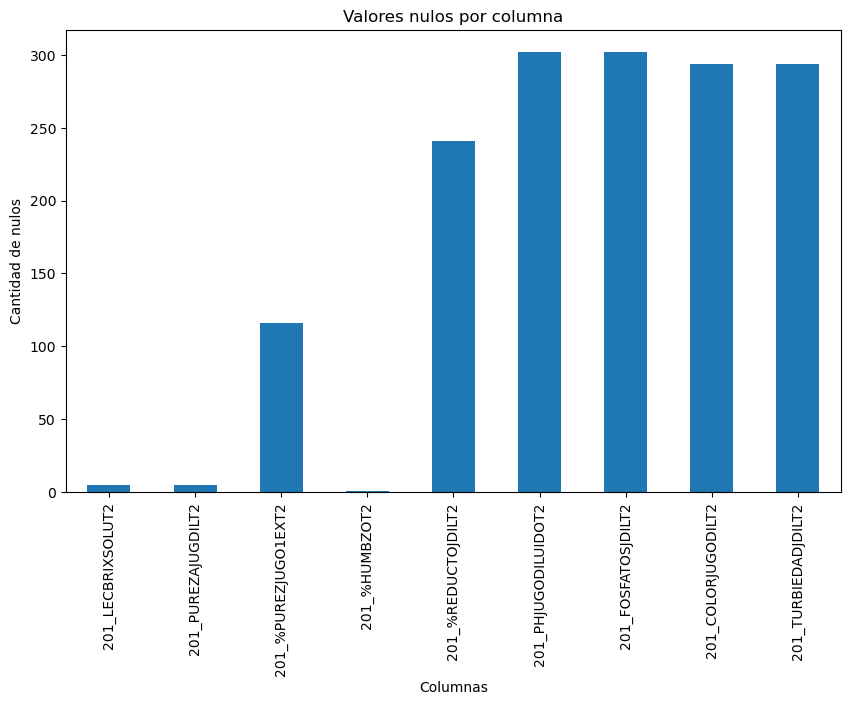

In [62]:
# Contar valores nulos por columna
nulos = df_resample_1h.isnull().sum()

# Filtrar solo las columnas que tienen nulos
nulos = nulos[nulos > 0]

# Crear gráfico de barras con la cantidad de nulos
plt.figure(figsize=(10,6))
nulos.plot(kind="bar")
plt.title("Valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=90)
plt.show()

**Se grafica cada variable para analizar la distribucion y el resumen estadistico**

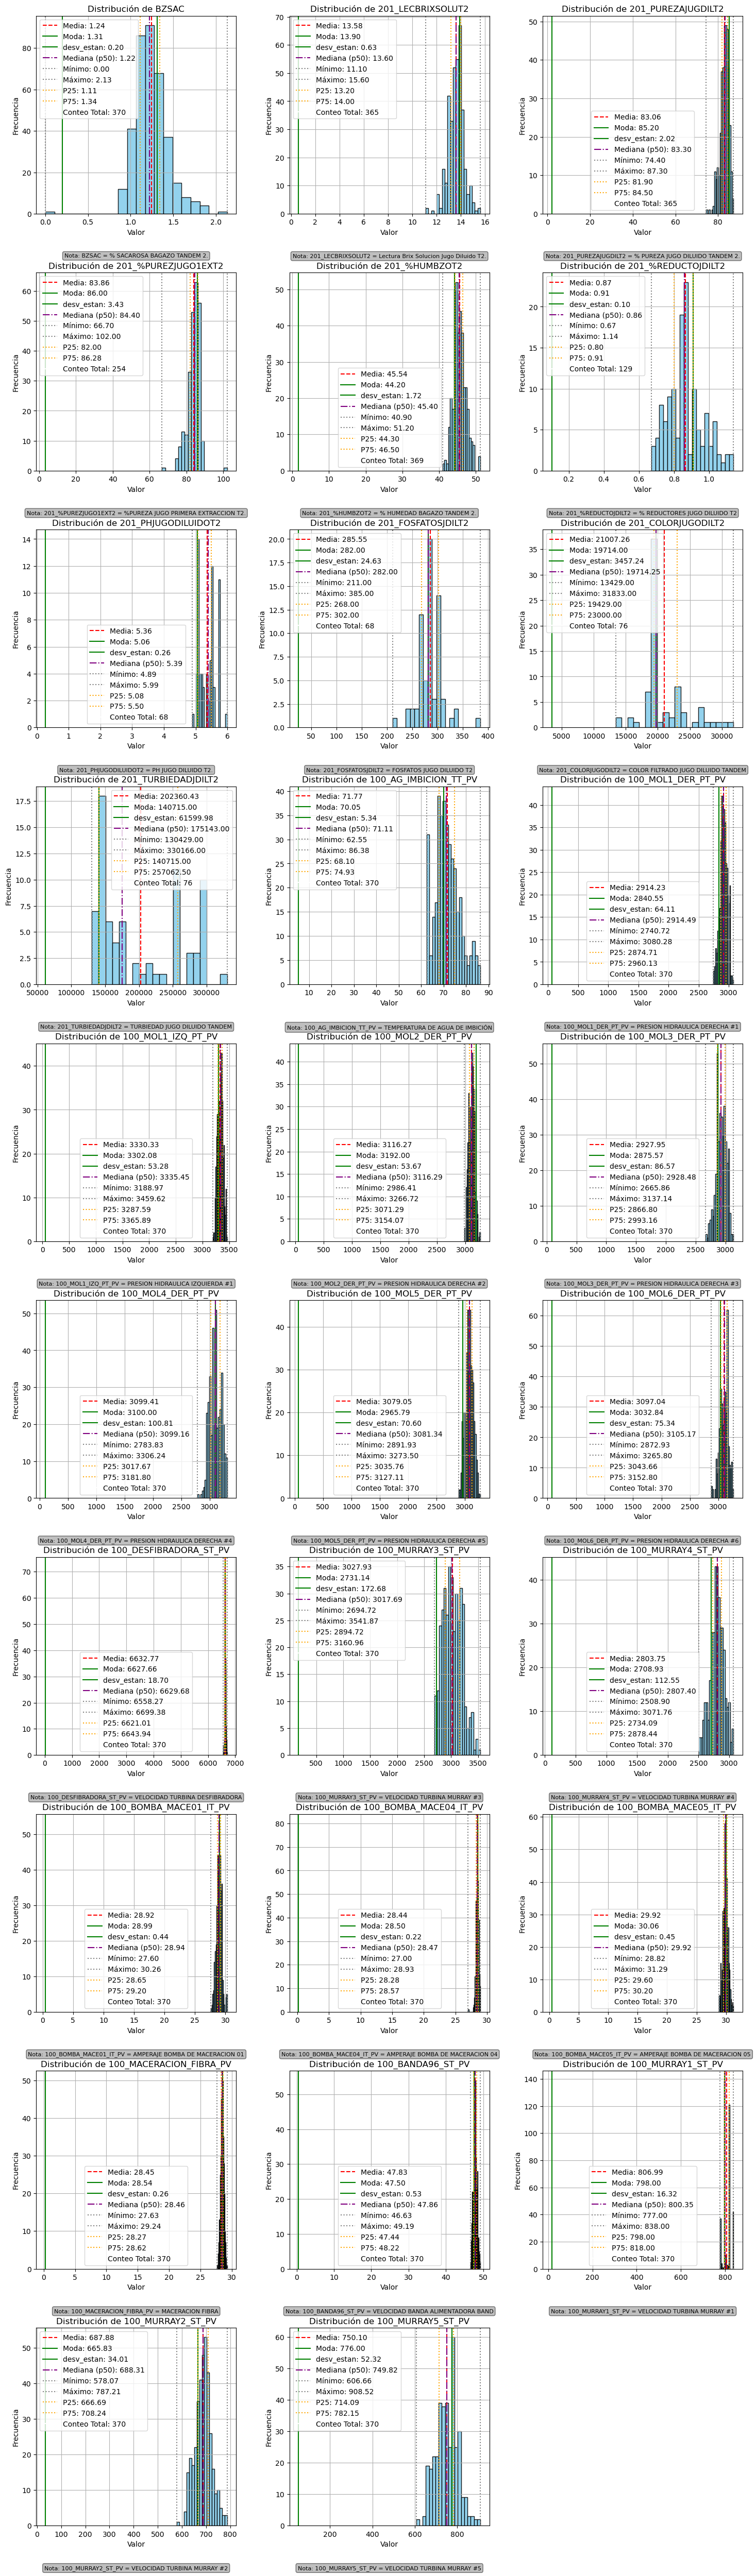

In [63]:
import matplotlib.pyplot as plt

# Se seleccionan las columnas a graficar y sus descripciones basadas en el diccionario de datos y el análisis previo.
columnas_dict = {
    'BZSAC': '% SACAROSA BAGAZO TANDEM 2.',
    '201_LECBRIXSOLUT2': 'Lectura Brix Solucion Jugo Diluido T2.',
    '201_PUREZAJUGDILT2': '% PUREZA JUGO DILUIDO TANDEM 2.',
    '201_%PUREZJUGO1EXT2': '%PUREZA JUGO PRIMERA EXTRACCION T2.',
    '201_%HUMBZOT2': '% HUMEDAD BAGAZO TANDEM 2.',
    '201_%REDUCTOJDILT2': '% REDUCTORES JUGO DILUIDO T2',
    '201_PHJUGODILUIDOT2': 'PH JUGO DILUIDO T2.',
    '201_FOSFATOSJDILT2': 'FOSFATOS JUGO DILUIDO T2',
    '201_COLORJUGODILT2': 'COLOR FILTRADO JUGO DILUIDO TANDEM',
    '201_TURBIEDADJDILT2': 'TURBIEDAD JUGO DILUIDO TANDEM',
    '100_AG_IMBICION_TT_PV': 'TEMPERATURA DE AGUA DE IMBICIÓN',
    '100_MOL1_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #1',
    '100_MOL1_IZQ_PT_PV': 'PRESION HIDRAULICA IZQUIERDA #1',
    '100_MOL2_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #2',
    '100_MOL3_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #3',
    '100_MOL4_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #4',
    '100_MOL5_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #5',
    '100_MOL6_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #6',
    '100_DESFIBRADORA_ST_PV': 'VELOCIDAD TURBINA DESFIBRADORA',
    '100_MURRAY3_ST_PV': 'VELOCIDAD TURBINA MURRAY #3',
    '100_MURRAY4_ST_PV': 'VELOCIDAD TURBINA MURRAY #4',
    '100_BOMBA_MACE01_IT_PV': 'AMPERAJE BOMBA DE MACERACION 01',
    '100_BOMBA_MACE04_IT_PV': 'AMPERAJE BOMBA DE MACERACION 04',
    '100_BOMBA_MACE05_IT_PV': 'AMPERAJE BOMBA DE MACERACION 05',
    '100_MACERACION_FIBRA_PV': 'MACERACION FIBRA',
    '100_BANDA96_ST_PV': 'VELOCIDAD BANDA ALIMENTADORA BAND',
    '100_MURRAY1_ST_PV': 'VELOCIDAD TURBINA MURRAY #1',
    '100_MURRAY2_ST_PV': 'VELOCIDAD TURBINA MURRAY #2',
    '100_MURRAY5_ST_PV': 'VELOCIDAD TURBINA MURRAY #5'
}

# La lista de columnas se crea automáticamente a partir del diccionario
columnas_a_graficar = list(columnas_dict.keys())
num_columnas = 3
num_filas = (len(columnas_a_graficar) + num_columnas - 1) // num_columnas

# Crear subplots de forma dinámica
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las columnas para crear cada gráfico
for i, (col, desc) in enumerate(columnas_dict.items()):
    # Crear el histograma
    axes[i].hist(df_resample_1h[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.9)
    axes[i].grid(True)
    
    # Se calculan las métricas por cada variable seleccionada.
    media = df_resample_1h[col].mean()
    moda = df_resample_1h[col].mode().iloc[0] if not df_resample_1h[col].mode().empty else np.nan
    minimo = df_resample_1h[col].min()  
    maximo = df_resample_1h[col].max()
    p_25 = df_resample_1h[col].quantile(0.25)
    p_50 = df_resample_1h[col].quantile(0.50)
    p_75 = df_resample_1h[col].quantile(0.75)
    conteo_total = df_resample_1h[col].count()
    desv_estand = df_resample_1h[col].std()
     

    # Añadir etiquetas y título
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

    # Añadir líneas verticales para las métricas
    axes[i].axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    axes[i].axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
    axes[i].axvline(desv_estand, color='green', linestyle='-', label=f'desv_estan: {desv_estand:.2f}')
    axes[i].axvline(p_50, color='purple', linestyle='-.', label=f'Mediana (p50): {p_50:.2f}')

    # Mostrar las métricas de máximo, mínimo y percentiles en la leyenda
    axes[i].axvline(minimo, color='gray', linestyle=':', label=f'Mínimo: {minimo:.2f}')
    axes[i].axvline(maximo, color='gray', linestyle=':', label=f'Máximo: {maximo:.2f}')
    axes[i].axvline(p_25, color='orange', linestyle=':', label=f'P25: {p_25:.2f}')
    axes[i].axvline(p_75, color='orange', linestyle=':', label=f'P75: {p_75:.2f}')

    # Añadir una línea transparente para incluir el conteo total en la leyenda
    axes[i].axvline(np.nan, color='white', linestyle='-', label=f'Conteo Total: {conteo_total}')

    axes[i].legend()

    # Añadir la nota centrada
    axes[i].text(x=0.5, y=-0.2, s=f"Nota: {col} = {desc}",
                 transform=axes[i].transAxes,
                 fontsize=8,
                 ha='center',
                 va='top',
                 bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))

# Eliminar los subplots vacíos que no se usaron
for j in range(len(columnas_a_graficar), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Ahora se realiza la matriz de correlacion**

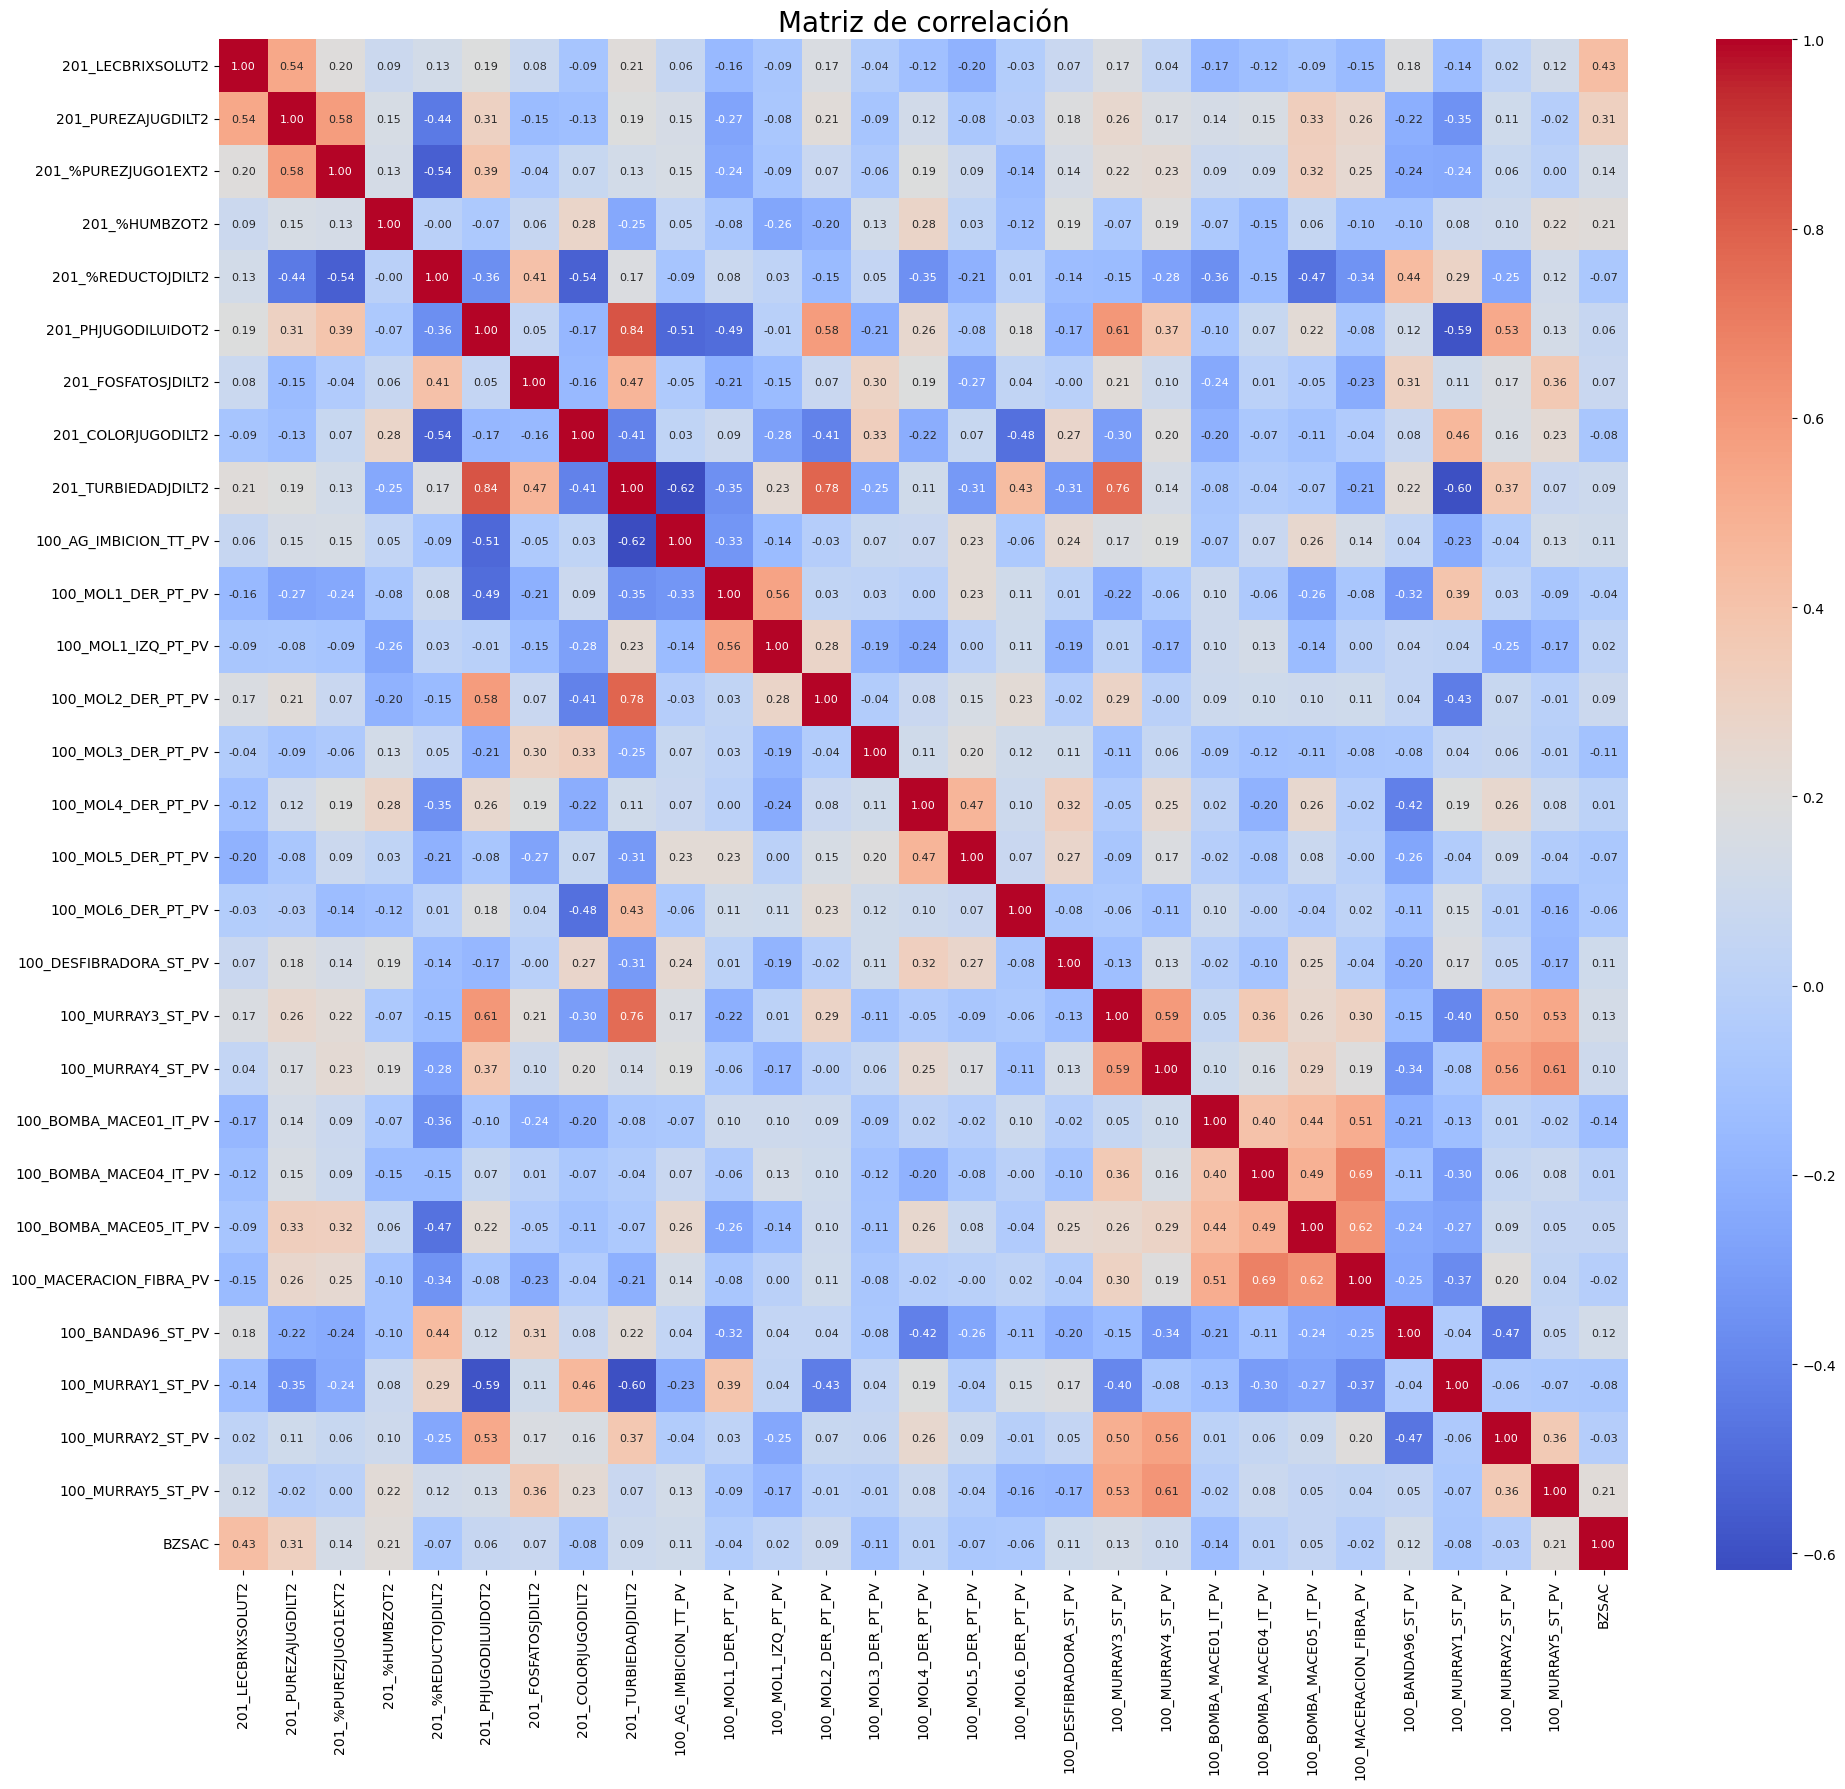

In [64]:
# 3. Calcular la matriz de correlación con el método Pearson.
correlation_matrix = df_resample_1h.corr(method='pearson')

# 4. Mostrar la matriz en consola
# print("\nMatriz de correlación:")
# print(correlation_matrix)

# 5. Visualizar la correlación como mapa de calor.
plt.figure(figsize=(20, 18))

sns.heatmap(
    correlation_matrix,
    annot=True,            # Mostrar los valores de correlación
    cmap="coolwarm",       # Mapa de color (coolwarm es bueno para correlaciones +/-)
    fmt=".2f",             # Formato a dos decimales
    annot_kws={"size": 8}  # Tamaño de la fuente para los valores anotados
)

plt.title("Matriz de correlación", fontsize=20) # Tamaño del título
plt.xticks(fontsize=10, rotation=90) # Rotación de las etiquetas del eje X para que no se superpongan
plt.yticks(fontsize=10, rotation=0)  # Ajuste del tamaño de las etiquetas del eje Y
plt.tight_layout()
plt.show()

**Ahora se genera la matriz de correlacion de Spearman para ver por rangos las variables continuas y se ordena descendentemente por la variable objetivo BZSAC**

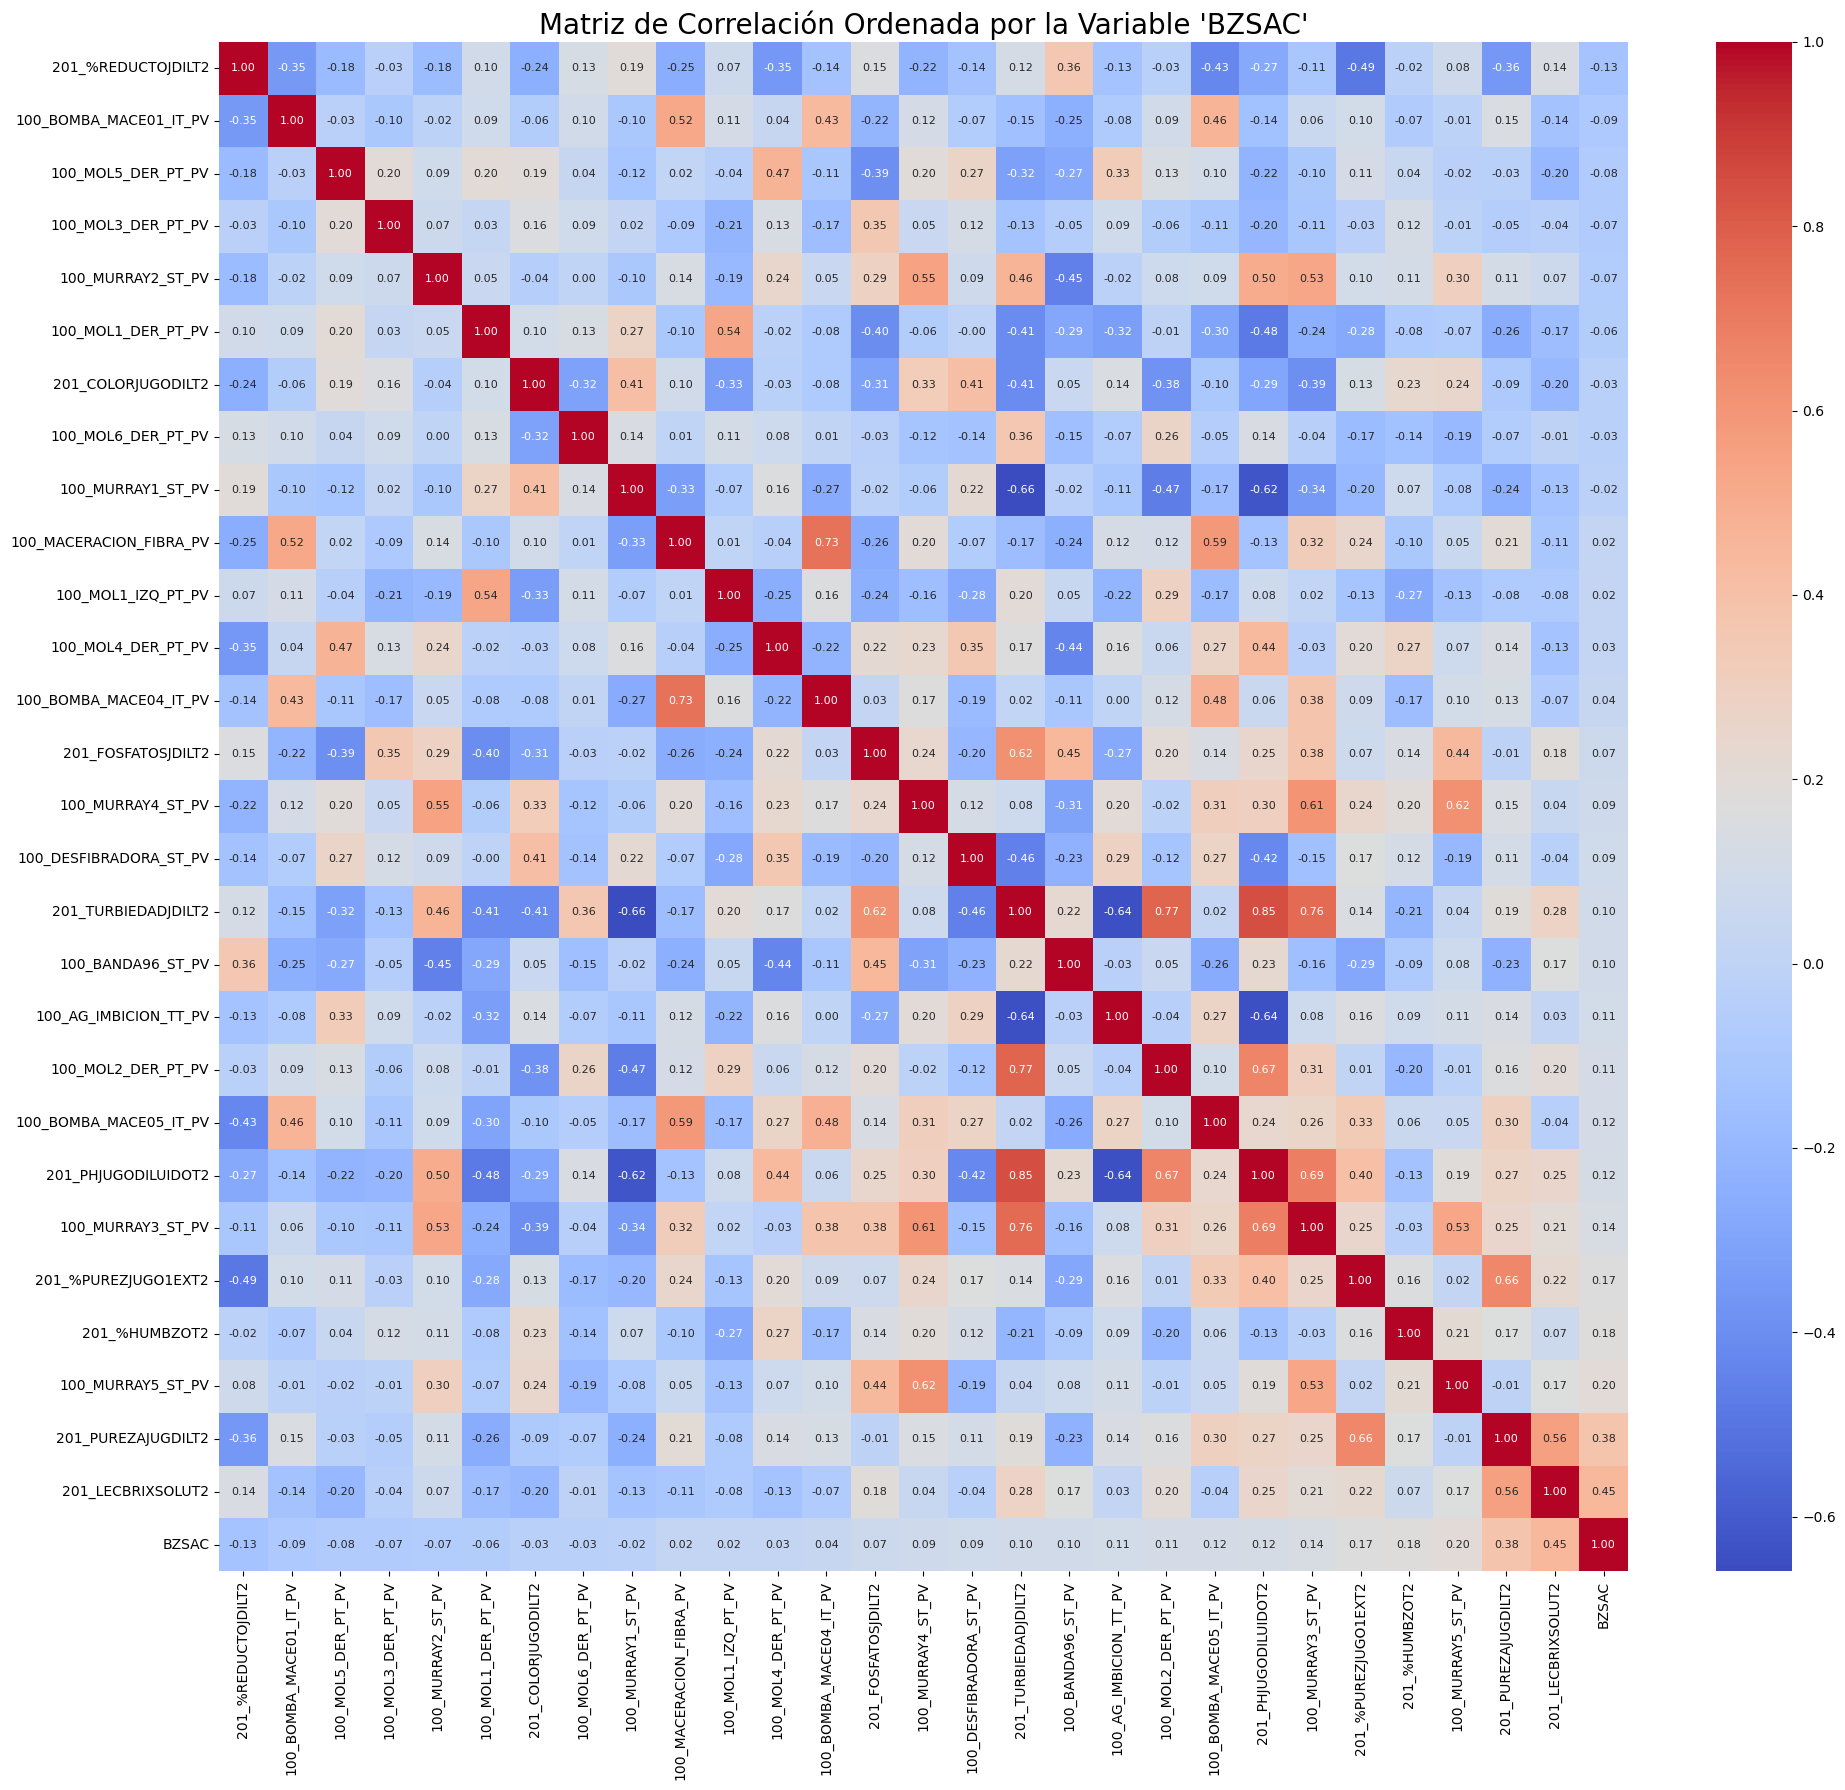


Correlaciones de 'BZSAC' ordenadas de menor a mayor:
201_%REDUCTOJDILT2        -0.131615
100_BOMBA_MACE01_IT_PV    -0.094998
100_MOL5_DER_PT_PV        -0.075036
100_MOL3_DER_PT_PV        -0.070901
100_MURRAY2_ST_PV         -0.067014
100_MOL1_DER_PT_PV        -0.057715
201_COLORJUGODILT2        -0.031220
100_MOL6_DER_PT_PV        -0.030530
100_MURRAY1_ST_PV         -0.019360
100_MACERACION_FIBRA_PV    0.022696
100_MOL1_IZQ_PT_PV         0.023827
100_MOL4_DER_PT_PV         0.025993
100_BOMBA_MACE04_IT_PV     0.035201
201_FOSFATOSJDILT2         0.069486
100_MURRAY4_ST_PV          0.085795
100_DESFIBRADORA_ST_PV     0.087945
201_TURBIEDADJDILT2        0.096247
100_BANDA96_ST_PV          0.098653
100_AG_IMBICION_TT_PV      0.105177
100_MOL2_DER_PT_PV         0.114832
100_BOMBA_MACE05_IT_PV     0.117829
201_PHJUGODILUIDOT2        0.120433
100_MURRAY3_ST_PV          0.137552
201_%PUREZJUGO1EXT2        0.172514
201_%HUMBZOT2              0.179128
100_MURRAY5_ST_PV          0.197499
201_PUREZA

In [65]:

# 1. Calcular la matriz de correlación
correlation_matrix = df_resample_1h.corr(method='spearman')

# 2. Seleccionar la fila de correlaciones de la variable objetivo 'BZSAC'
correlations_with_target = correlation_matrix['BZSAC']

# 3. Ordenar las correlaciones en orden ascendente (de menor a mayor)
sorted_correlations = correlations_with_target.sort_values(ascending=True)

# 4. Reordenar la matriz de correlación para la visualización
# Esto se hace para que el heatmap muestre las variables en el orden deseado
ordered_columns = sorted_correlations.index
ordered_correlation_matrix = correlation_matrix.loc[ordered_columns, ordered_columns]

# 5. Visualizar la matriz de correlación ordenada
plt.figure(figsize=(20, 18))
sns.heatmap(
    ordered_correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.title("Matriz de Correlación Ordenada por la Variable 'BZSAC'", fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Para ver solo las correlaciones de 'BZSAC' en una Serie ordenada
print("\nCorrelaciones de 'BZSAC' ordenadas de menor a mayor:")
print(sorted_correlations)

Al observar los datos, en especial la matriz de correlacion se  seleccionan las siguientes 2 variables: 

* 201_LECBRIXSOLUT2	Lectura Brix Solucion Jugo Diluido T2
* 201_PUREZAJUGDILT2	% PUREZA JUGO DILUIDO TANDEM 2

Por sugerencia del dominio de negocio (dada la dinamica del proceso), se listan tambien las siguientes variables:

* 100_MURRAY5_ST_PV          
* 100_MURRAY3_ST_PV
* 201_%HUMBZOT2              


**Una vez seleccionadas las variables, se analiza la distribución de cada una:**

* 201_LECBRIXSOLUT2	Lectura Brix Solucion Jugo Diluido T2 contiene un total de 290 registros:

    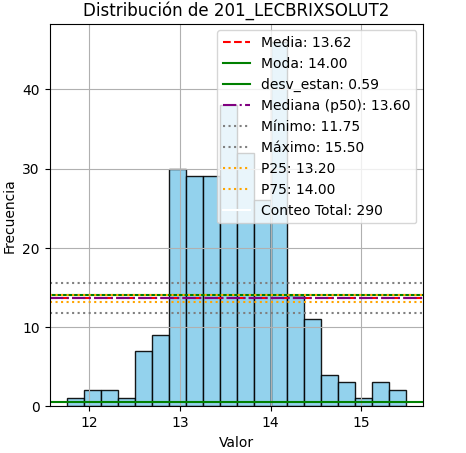

    * **Media** = El valor promedio de Brix en las 290 mediciones es 13.62.
    * **Mediana** El valor central es 13.60
    * **Moda**= El valor que más se repite en el conjunto de datos es 14.00
    * **Desviación Estandard**= La baja desviación estándar y el pequeño rango intercuartílico son las claves aquí. Nos dicen que el proceso es muy estable y consistente. La concentración de azúcar del jugo que se envía a la fábrica no fluctúa drásticamente, lo cual es ideal para mantener un control de proceso eficiente en las etapas posteriores (clarificación, evaporación, etc.)
    

* 201_PUREZAJUGDILT2 % PUREZA JUGO DILUIDO TANDEM 2 contiene un total de 290 registros:

    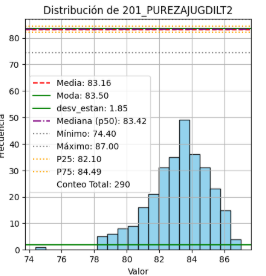

    * **Media** = El valor promedio del % de pureza en las 290 mediciones es 83.16.
    * **Mediana** El valor central es 83.42
    * **Moda**= El valor que más se repite en el conjunto de datos es 83.50
    * **Desviación Estandard**= La desviación estandard de 1.85, nos indica que la mayoría de las mediciones estuvieron muy agrupadas cerca del promedio, lo que es una buena señal de que el proceso fue estable
    





Se grafican los valores nulos de las variables mas correlacionadas

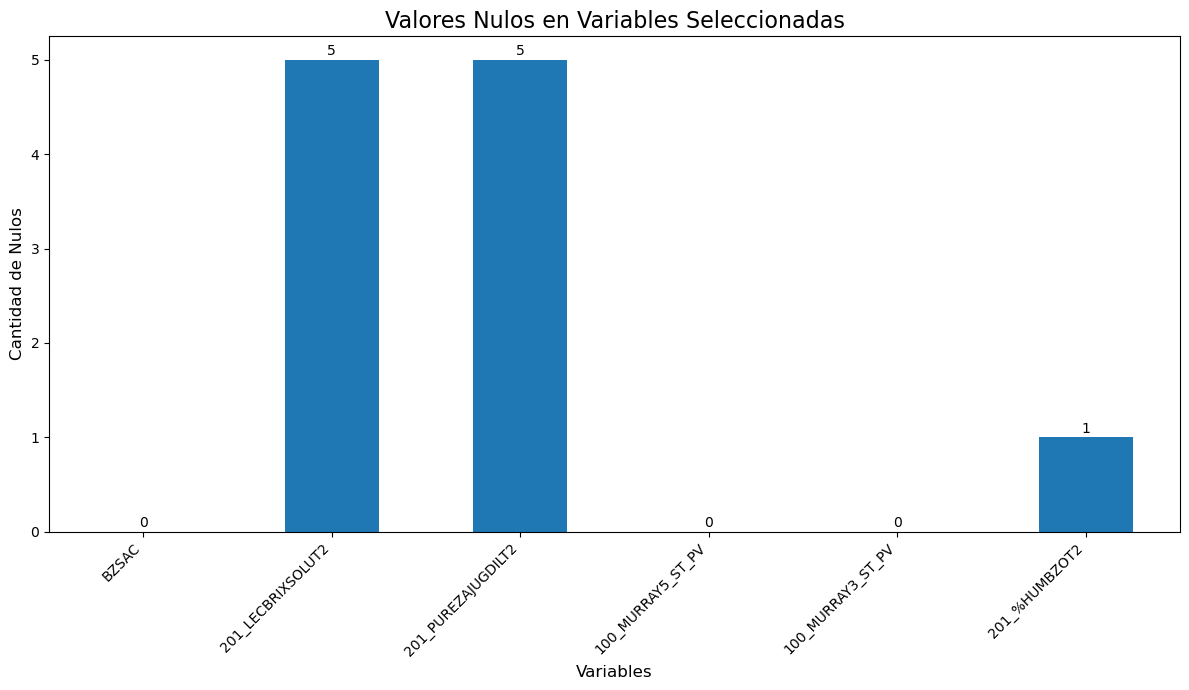

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de las columnas específicas que se quieren analizar, incluyendo 'BZSAC'
columnas_seleccionadas = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# Contar los valores nulos solo para las columnas seleccionadas
nulos_seleccionados = df_resample_1h[columnas_seleccionadas].isnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(12, 7)) 
ax = nulos_seleccionados.plot(kind="bar")

# Ajustar la posición vertical del contador sobre cada barra
for i, v in enumerate(nulos_seleccionados):
    # Ajusta el valor '1' para controlar la distancia del texto a la barra
    ax.text(i, v + 0.05, str(v), color='black', ha='center')


plt.title("Valores Nulos en Variables Seleccionadas", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Cantidad de Nulos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Ahora se genera la matriz de correlacion solo para las variables mas correlacionadas con nuestra variable objetivo**

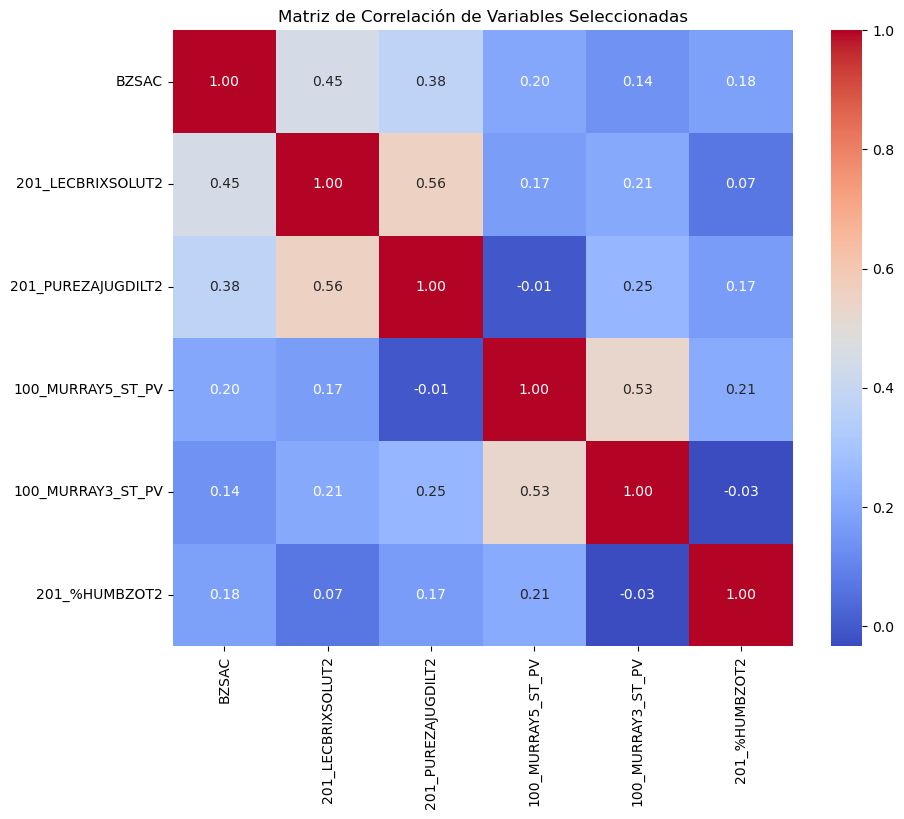

In [67]:

# 1. Define las variables de interés
variables_interes = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# 2. Crea un subconjunto del DataFrame con esas variables
df_sub = df_resample_1h[variables_interes].copy()

# 3. Calcula la matriz de correlación para el subconjunto
correlation_matrix_sub = df_sub.corr(method='spearman')

# 4. Visualiza la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sub, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()

**Eliminar los datos nulos**

Teniendo en cuenta que **la cantidad de valores nulos por variable es considerablemente menor en comparación con el total de registros**, se optó por **eliminar** aquellos **registros** que presentan valores faltantes.

In [68]:
# Lista de las columnas específicas en las que quieres eliminar nulos
columnas_con_nulos = ['201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# Eliminar las filas donde al menos una de las columnas de la lista tenga un valor nulo
df_sin_nulos = df_resample_1h.dropna(subset=columnas_con_nulos)

# Opcional: imprimir las dimensiones de ambos DataFrames para verificar el cambio
print(f"Número de filas en el DataFrame original: {df_resample_1h.shape[0]}")
print(f"Número de filas en el DataFrame sin nulos: {df_sin_nulos.shape[0]}")

Número de filas en el DataFrame original: 370
Número de filas en el DataFrame sin nulos: 365


**Se vuelve a generar la matriz de correlacion Spearman para las variables seleccionadas y se analiza el cambio de valores**

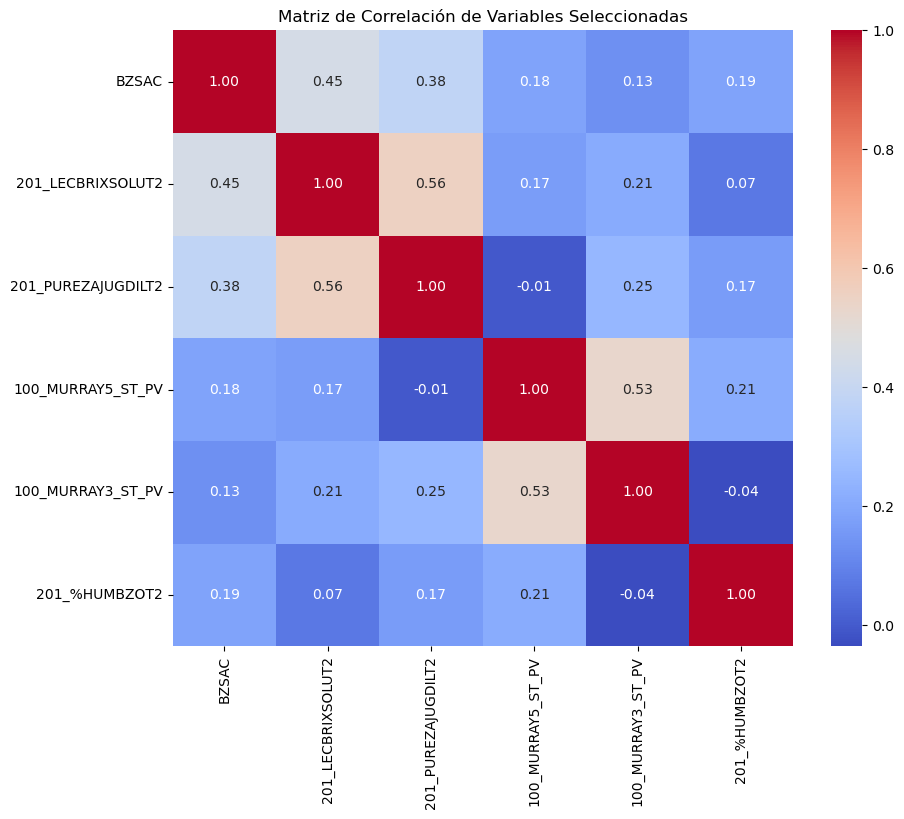

In [69]:

# 1. Define las variables de interés
variables_interes = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# 2. Crea un subconjunto del DataFrame con esas variables
df_sub = df_sin_nulos[variables_interes].copy()

# 3. Calcula la matriz de correlación para el subconjunto
correlation_matrix_sub = df_sub.corr(method='spearman')

# 4. Visualiza la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sub, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()

**Se Grafica el pairplot de las variables seleccionadas**

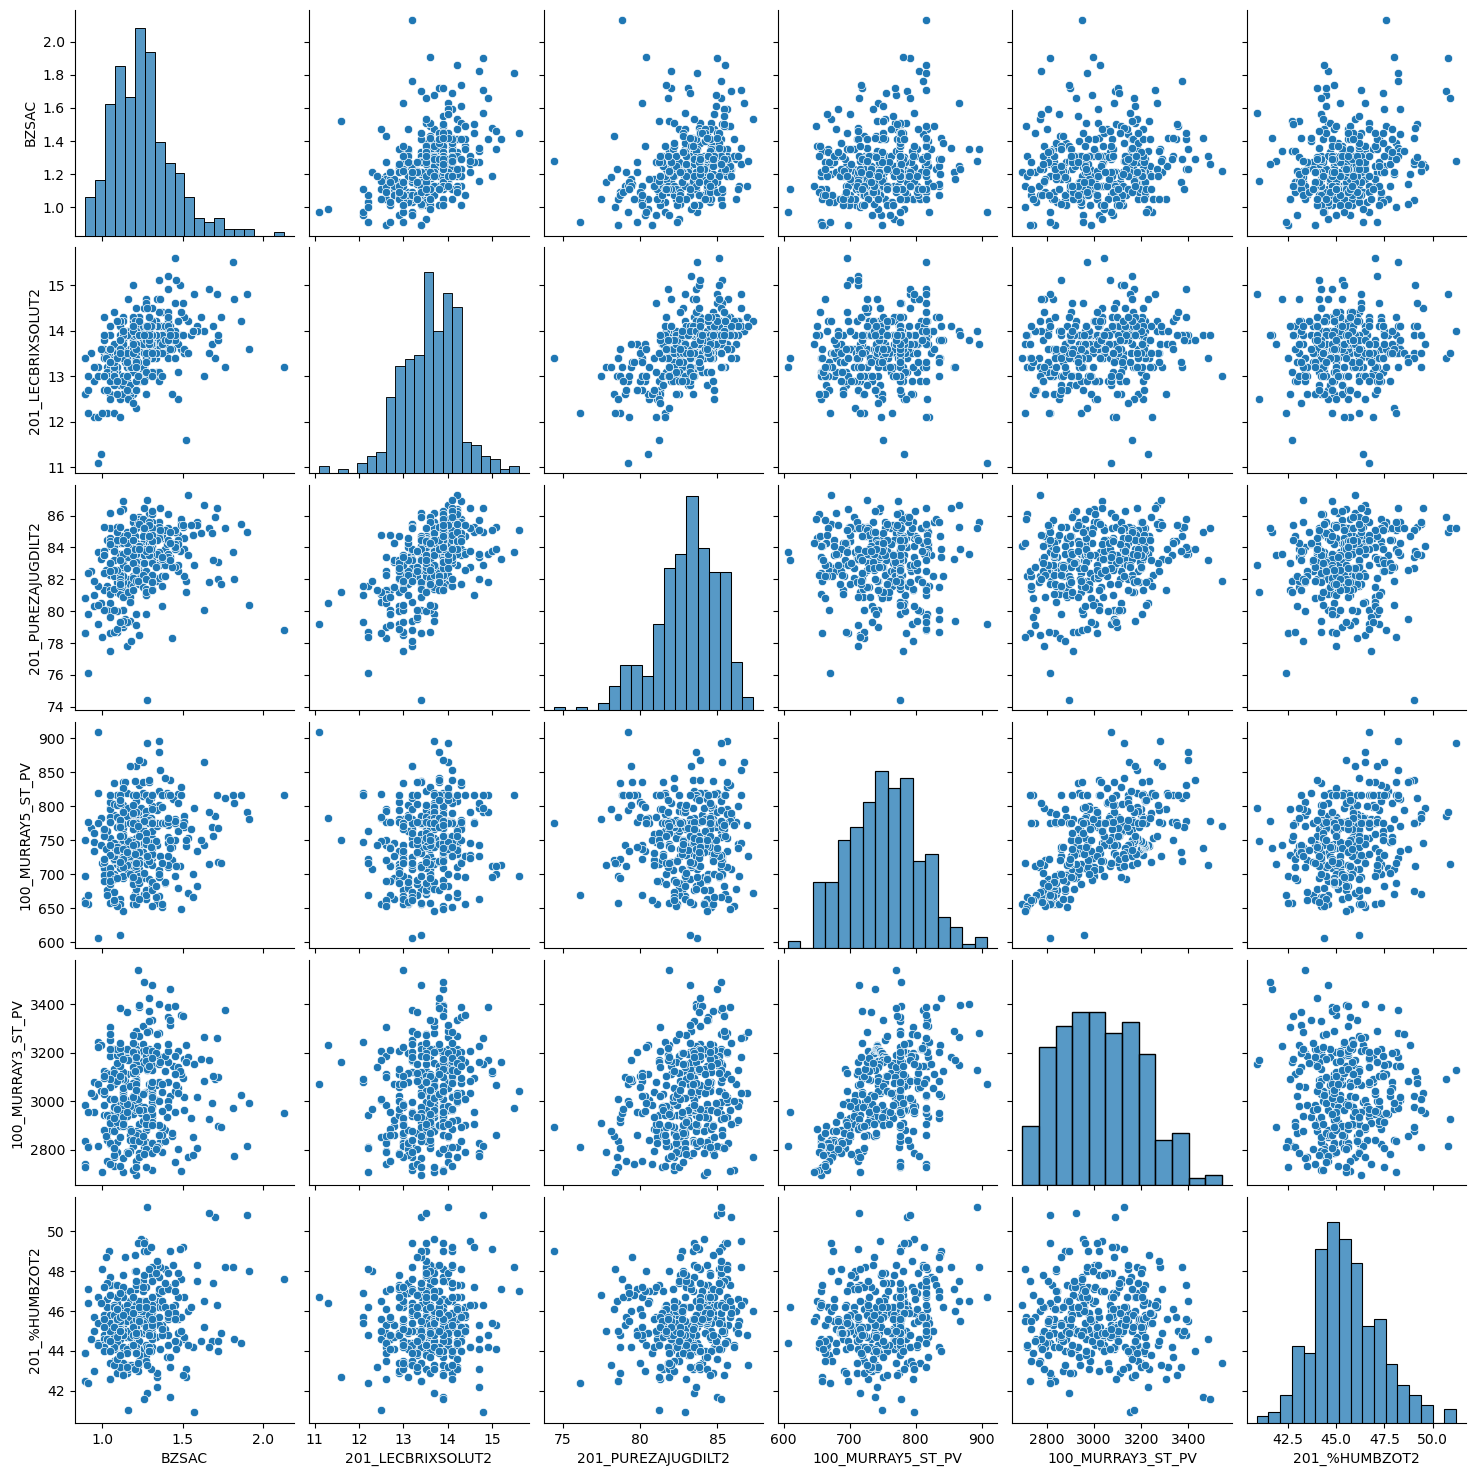

In [70]:
# 1. Define las variables de interés
variables_interes = ['BZSAC', '201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2', '100_MURRAY5_ST_PV', '100_MURRAY3_ST_PV', '201_%HUMBZOT2']

# 2. Crea un subconjunto del DataFrame con esas variables
df_sub = df_sin_nulos[variables_interes].copy()

# 3. Genera el pairplot
sns.pairplot(df_sub)

# 4. Muestra el gráfico
plt.show()

**Ahora se analizan la variable objetivo BZSAC vs variables seleccionadas**

**BZSAC Vs 201_LECBRIXSOLUT2**

*Grafica con el dataset reducido*

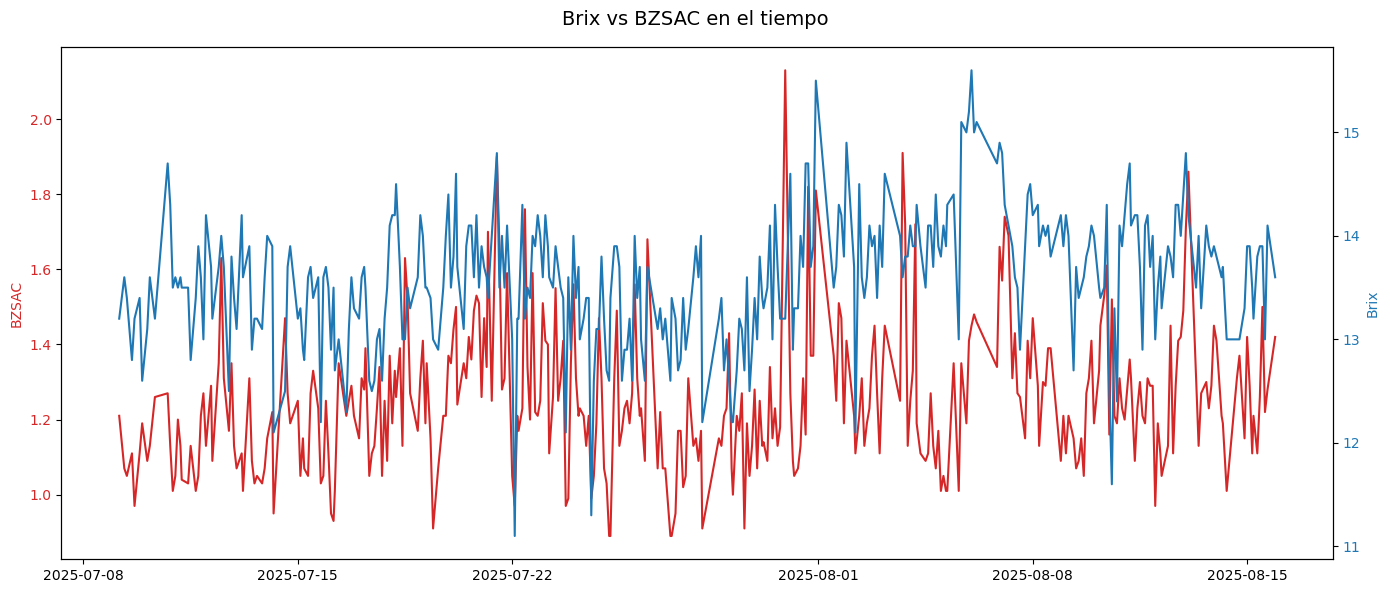

In [71]:

# Filtrar columnas necesarias
df_brix = df_sin_nulos[['BZSAC', '201_LECBRIXSOLUT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_brix.index, df_brix['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix.index, df_brix['201_LECBRIXSOLUT2'], color='tab:blue', label='Brix (Jugo diluido)')
ax2.set_ylabel('Brix', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle("Brix vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()



*Grafica con el dataset original*

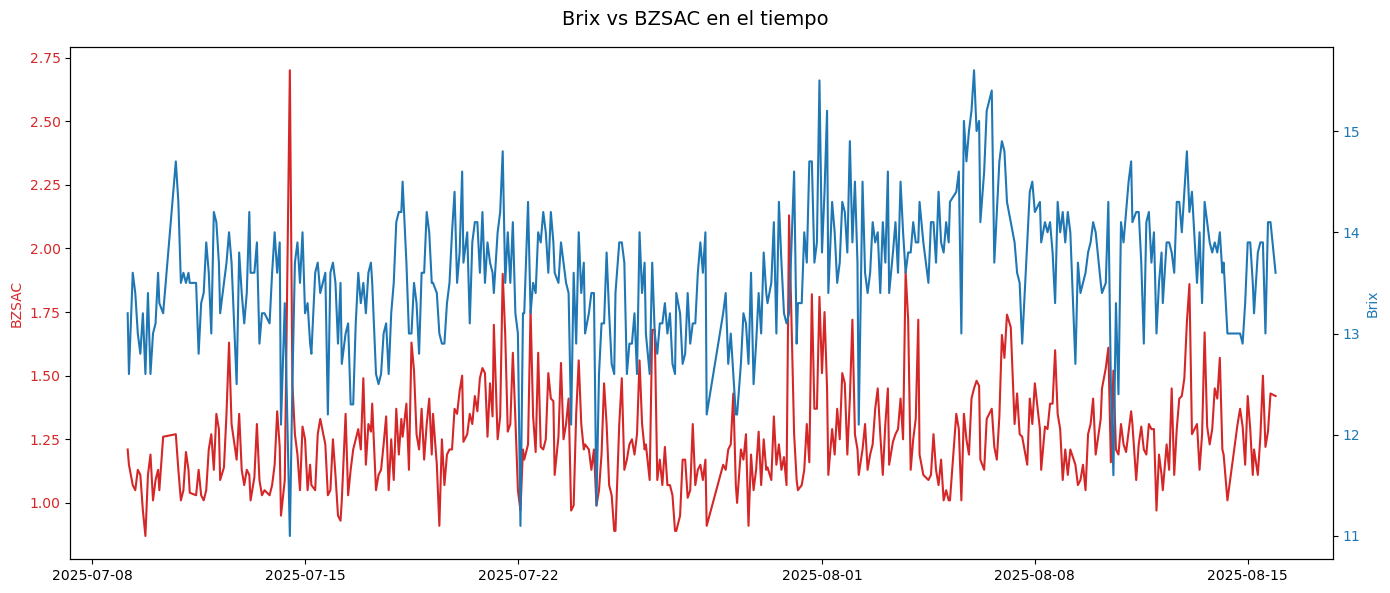

In [72]:
# Filtrar columnas necesarias
df_brix = df[['Time', 'BZSAC', '201_LECBRIXSOLUT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_brix['Time'], df_brix['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix['Time'], df_brix['201_LECBRIXSOLUT2'], color='tab:blue', label='Brix (Jugo diluido)')
ax2.set_ylabel('Brix', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle("Brix vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()

*Grafica con el dataset original y media movil*

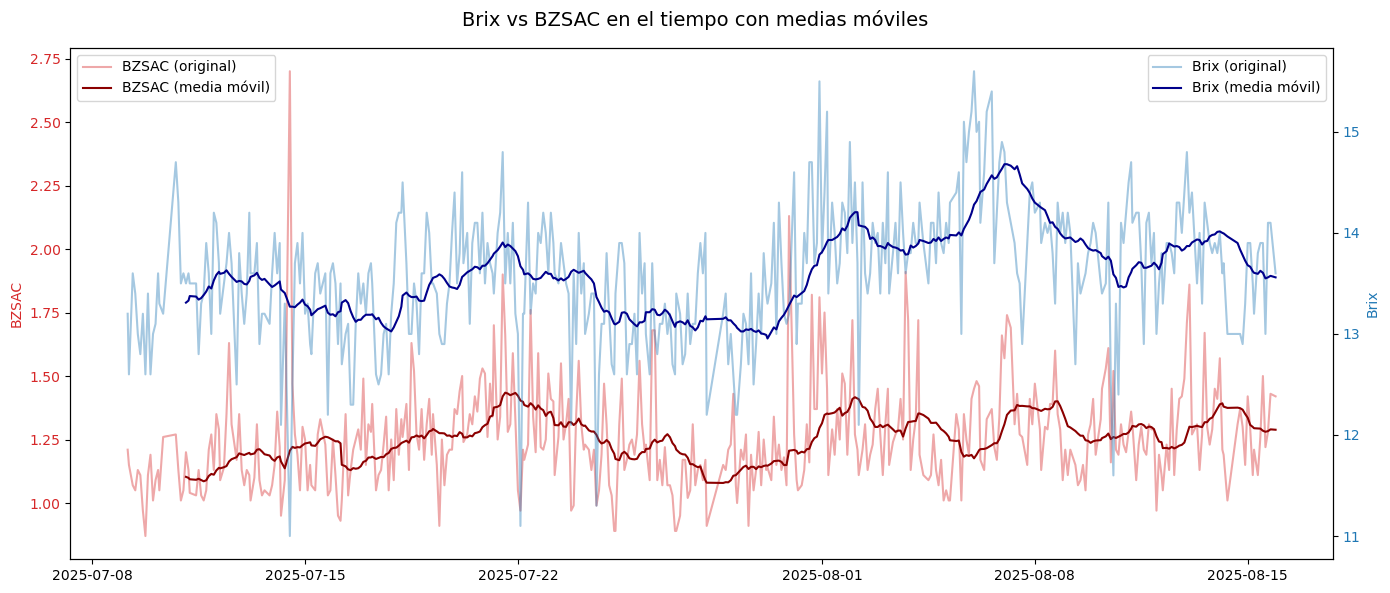

In [73]:
# Filtrar columnas necesarias
df_brix = df[['Time', 'BZSAC', '201_LECBRIXSOLUT2']].dropna()

# Calcular medias móviles (ejemplo con ventana de 10)
df_brix['BZSAC_MA'] = df_brix['BZSAC'].rolling(window=20).mean()
df_brix['BRIXSOLUT2_MA'] = df_brix['201_LECBRIXSOLUT2'].rolling(window=20).mean()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

# Variable original + media móvil
ax1.plot(df_brix['Time'], df_brix['BZSAC'], color='tab:red', alpha=0.4, label='BZSAC (original)')
ax1.plot(df_brix['Time'], df_brix['BZSAC_MA'], color='darkred', label='BZSAC (media móvil)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix['Time'], df_brix['201_LECBRIXSOLUT2'], color='tab:blue', alpha=0.4, label='Brix (original)')
ax2.plot(df_brix['Time'], df_brix['BRIXSOLUT2_MA'], color='darkblue', label='Brix (media móvil)')
ax2.set_ylabel('Brix', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle("Brix vs BZSAC en el tiempo con medias móviles", fontsize=14)
fig.tight_layout()

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


**BZSAC Vs 201_PUREZAJUGDILT2**

*Grafica con el dataset reducido*

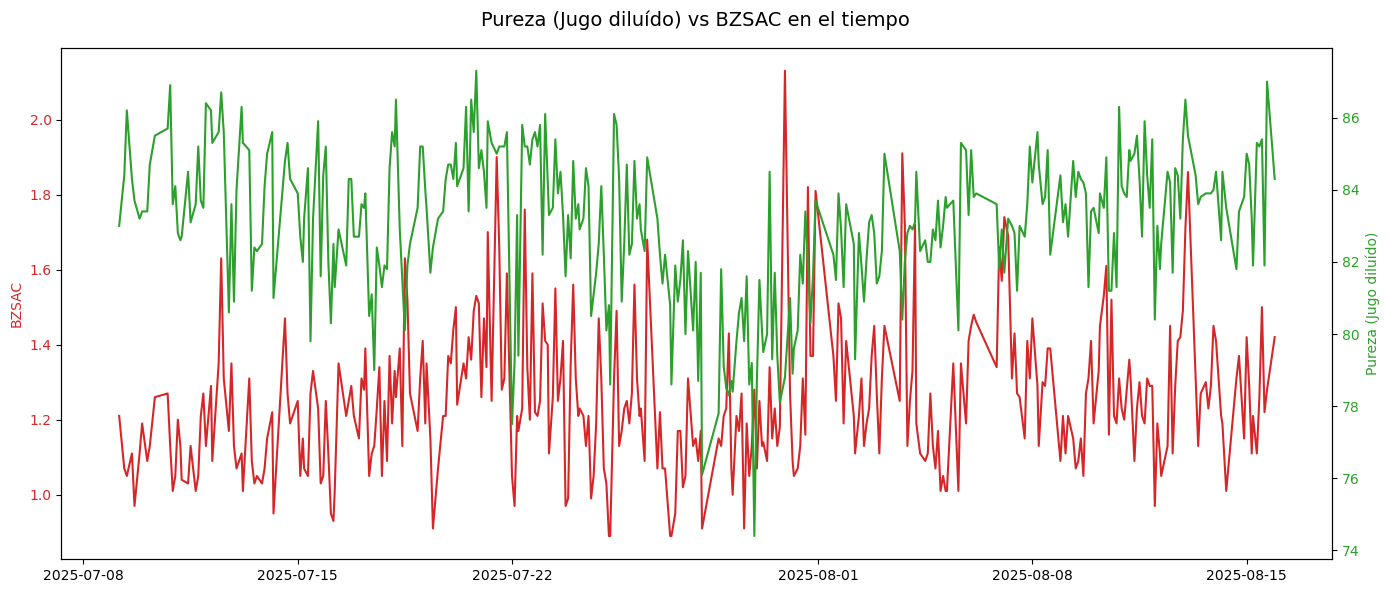

In [74]:
# Filtrar columnas necesarias
df_brix = df_sin_nulos[['BZSAC', '201_PUREZAJUGDILT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_brix.index, df_brix['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix.index, df_brix['201_PUREZAJUGDILT2'], color='tab:green', label='Pureza (Jugo diluído)')
ax2.set_ylabel('Pureza (Jugo diluído)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.suptitle("Pureza (Jugo diluído) vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()

*Grafica con el dataset original*

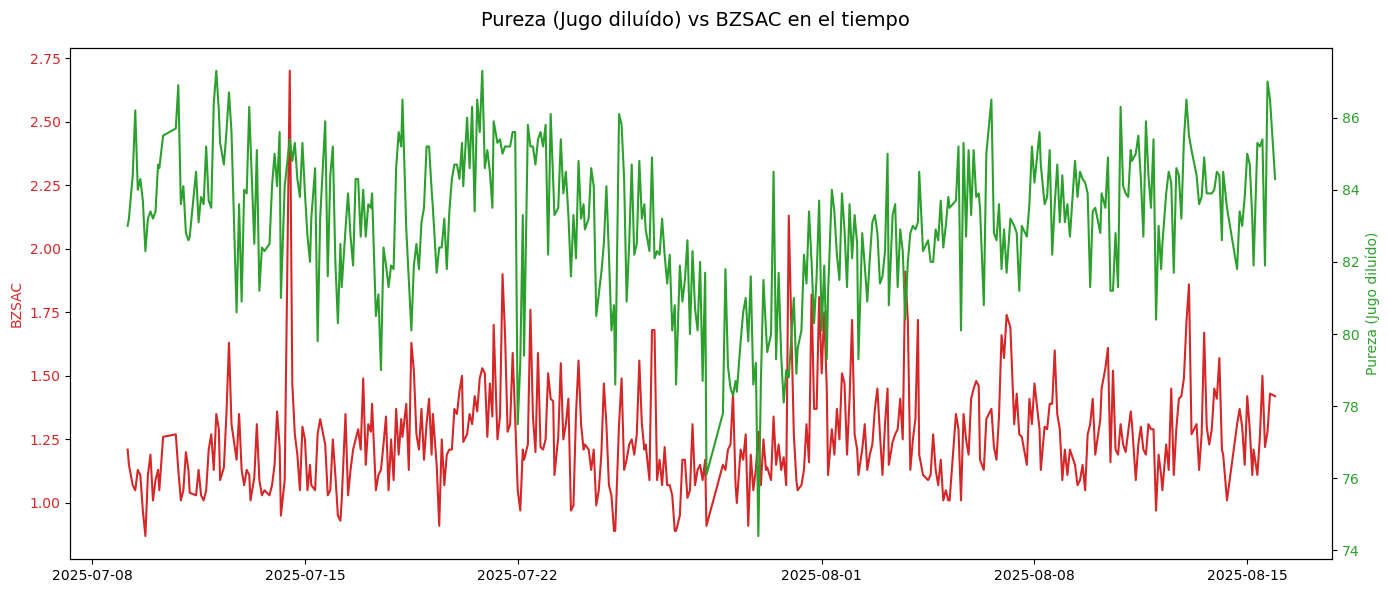

In [75]:
# Filtrar columnas necesarias
df_brix = df[['Time','BZSAC', '201_PUREZAJUGDILT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_brix['Time'], df_brix['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix['Time'], df_brix['201_PUREZAJUGDILT2'], color='tab:green', label='Pureza (Jugo diluído)')
ax2.set_ylabel('Pureza (Jugo diluído)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.suptitle("Pureza (Jugo diluído) vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()

*Gráfica con el dataset original y media movil*

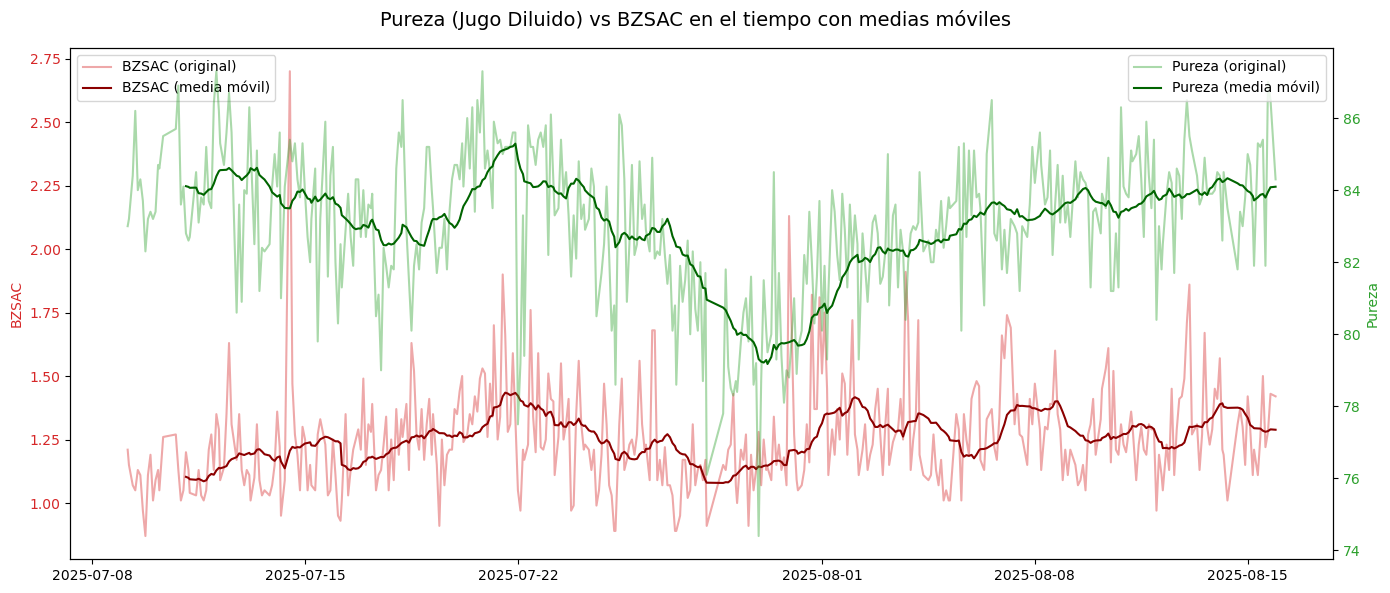

In [76]:
# Filtrar columnas necesarias
df_brix = df[['Time', 'BZSAC', '201_PUREZAJUGDILT2']].dropna()

# Calcular medias móviles (ejemplo con ventana de 10)
df_brix['BZSAC_MA'] = df_brix['BZSAC'].rolling(window=20).mean()
df_brix['201_PUREZAJUGDILT2_MA'] = df_brix['201_PUREZAJUGDILT2'].rolling(window=20).mean()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

# Variable original + media móvil
ax1.plot(df_brix['Time'], df_brix['BZSAC'], color='tab:red', alpha=0.4, label='BZSAC (original)')
ax1.plot(df_brix['Time'], df_brix['BZSAC_MA'], color='darkred', label='BZSAC (media móvil)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix['Time'], df_brix['201_PUREZAJUGDILT2'], color='tab:green', alpha=0.4, label='Pureza (original)')
ax2.plot(df_brix['Time'], df_brix['201_PUREZAJUGDILT2_MA'], color='darkgreen', label='Pureza (media móvil)')
ax2.set_ylabel('Pureza', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.suptitle("Pureza (Jugo Diluido) vs BZSAC en el tiempo con medias móviles", fontsize=14)
fig.tight_layout()

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


### **Analisis de resultados**

* La muestra de datos proporcionada por el Ingenio X no fue suficiente para identificar un patrón consistente con el proceso de producción. Aunque se solicitó un registro histórico de los últimos 6 meses, solo se recibieron datos de la variable objetivo BZSAC de un mes y una semana. Para un análisis coherente, se tuvo que ajustar el resto de las variables a este mismo rango de tiempo.

* Se encontró una correlación positiva leve entre BZSAC (% de sacarosa en el bagazo) y el BRIX (sólidos solubles en el jugo). Teóricamente, se esperaría una correlación negativa; a mayor BRIX, menor BZSAC, ya que los sólidos del jugo deberían extraerse de manera más eficiente. El hallazgo de esta correlación positiva sugiere que existen factores en la operación de la planta que impactan ambas variables en la misma dirección. Por ejemplo:

    * Una mayor madurez de la variedad de caña podría resultar en un mayor BRIX.

    * Simultáneamente, problemas en el proceso de molienda o una mayor cantidad de fibra podrían causar una pérdida de sacarosa en el bagazo, aumentando el BZSAC.

    * Este patrón indica que, aunque la relación teórica es inversa, la dinámica real del proceso presenta complejidades que causan el aumento conjunto de ambas variables.

* El diccionario de datos proporcionado no brindó la información suficiente para el dominio del negocio, como unidades de medida, tipo de dato y la periodicidad de los sensores. Se recomienda enriquecer este diccionario para futuros análisis.

* Además, se observó que el conjunto de datos carecía de homogeneidad en los registros. Un grupo de variables se registraba cada hora, mientras que otro lo hacía cada minuto. Fue necesario homogeneizar todas las variables a una misma periodicidad de muestreo para realizar un análisis comparativo adecuado.

* Finalmente, para obtener un análisis más completo, se considera que el conjunto de datos debe incluir un mayor número de variables del proceso (tanto de entrada como de salida) para un modelado y una interpretación más precisos.

### **Conclusiones**

* Dado que la variable objetivo presentó un rango limitado de valores, el análisis se vio restringido. Por lo tanto, se recomienda disponer de un mayor volumen de datos o de un rango temporal más amplio que permita identificar patrones más representativos y evaluar con mayor precisión posibles tendencias o correlaciones.

* Se observó una correlación leve entre las variables analizadas, menor a lo esperado. Inicialmente, esta falta de una correlación fuerte nos llevó a pensar que no existían conclusiones significativas. Sin embargo, al investigar más a fondo, se determinó que el problema de análisis es de pronóstico (forecasting) en lugar de regresión lineal. Esto indica que se deben usar modelos que capturen la naturaleza secuencial y temporal de los datos, en lugar de aquellos que asumen una relación lineal directa.

* Dado que no se encontró un patrón claro al comparar la variable objetivo con múltiples variables dependientes, se recomienda plantear una regresión múltiple. Este enfoque permitirá evaluar el impacto combinado de varias variables independientes sobre la variable objetivo, lo cual podría revelar relaciones más complejas que un análisis bivariado simple no detecta.